### Предварительная подготовка данных

In [1]:
import numpy as np
import pandas as pd
import re
pd.options.display.max_rows = 310
pd.options.display.max_columns = 150

In [2]:
data = pd.read_csv('credit_train.csv', encoding = 'cp1251', sep=';')
print(data.shape)
data.drop('client_id', axis=1, inplace=True)
data.head()

(170746, 15)


,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


In [3]:
#Количество и список уникальных значений
print(data['living_region'].nunique())
data['living_region'].unique()

301


array(['КРАСНОДАРСКИЙ КРАЙ', 'МОСКВА', 'ОБЛ САРАТОВСКАЯ',
       'ОБЛ ВОЛГОГРАДСКАЯ', 'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ', 'СТАВРОПОЛЬСКИЙ КРАЙ',
       'ОБЛ НИЖЕГОРОДСКАЯ', 'МОСКОВСКАЯ ОБЛ',
       'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА', 'КРАЙ СТАВРОПОЛЬСКИЙ',
       'САНКТ-ПЕТЕРБУРГ', 'РЕСП. БАШКОРТОСТАН', 'ОБЛ АРХАНГЕЛЬСКАЯ',
       'ХАНТЫ-МАНСИЙСКИЙ АО', 'РЕСП БАШКОРТОСТАН', 'ПЕРМСКИЙ КРАЙ',
       'РЕСП КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'САРАТОВСКАЯ ОБЛ', 'ОБЛ КАЛУЖСКАЯ',
       'ОБЛ ВОЛОГОДСКАЯ', 'РОСТОВСКАЯ ОБЛ', 'УДМУРТСКАЯ РЕСП',
       'ОБЛ ИРКУТСКАЯ', 'ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ', 'ОБЛ МОСКОВСКАЯ',
       'ОБЛ ТЮМЕНСКАЯ', 'ОБЛ БЕЛГОРОДСКАЯ', 'РОСТОВСКАЯ ОБЛАСТЬ',
       'ОБЛ КОСТРОМСКАЯ', 'РЕСП ХАКАСИЯ', 'РЕСПУБЛИКА ТАТАРСТАН',
       'ИРКУТСКАЯ ОБЛАСТЬ', 'ОБЛ СВЕРДЛОВСКАЯ', 'ОБЛ ПСКОВСКАЯ',
       'КРАЙ ЗАБАЙКАЛЬСКИЙ', 'СВЕРДЛОВСКАЯ ОБЛ', 'ОБЛ ОРЕНБУРГСКАЯ',
       'ОБЛ ВОРОНЕЖСКАЯ', 'ОБЛ АСТРАХАНСКАЯ', 'ОБЛ НОВОСИБИРСКАЯ',
       'ОБЛ ЧЕЛЯБИНСКАЯ', 'ОРЕНБУРГСКАЯ ОБЛ', 'СВЕРДЛОВСКАЯ ОБЛАСТЬ'

In [4]:
#Создаём серию с уникальными значениями living_region
regions = data['living_region'].unique()
regions = pd.Series(data=regions, index=regions, name='regions')

In [5]:
#Список слов для исключения (шум)
fltwrds = set(['ОБЛ', 'ОБЛАСТЬ', 'РЕСП', 'РЕСПУБЛИКА', 'КРАЙ', 'Г', 'АО', 'АОБЛ', 'АВТОНОМНАЯ'])

In [6]:
#Обработка значений серии (убрать слова из fltwrds)
def clean_region(x):
    x = re.sub('[.,]+', ' ', str(x)) #убираем .,
    words = x.split(' ')
    words_new = []
    for w in words:
        if not w in fltwrds:
            words_new.append(w) #добавляем в новый список только названия регионов
    x = ''.join(words_new)
    return x

In [7]:
regions = regions.map(clean_region)

In [8]:
# точечные корректировки в regions
regions['ЧУКОТСКИЙ АO'] = 'ЧУКОТСКИЙ'
regions['ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШИЯ ЧУВАШСКАЯ РЕСПУБЛИКА -'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШСКАЯ - ЧУВАШИЯ РЕСП'] = 'ЧУВАШСКАЯ'
regions['РЕСП ЧУВАШСКАЯ - ЧУВАШИЯ'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШСКАЯ - ЧУВАШИЯ РЕСП'] = 'ЧУВАШСКАЯ'
regions['РЕСПУБЛИКАТАТАРСТАН'] = 'ТАТАРСТАН'
regions['ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ'] = 'МОСКОВСКАЯ'
regions['ПЕРМСКАЯ ОБЛ'] = 'ПЕРМСКИЙ'
regions['ОРЁЛ'] = 'ОРЛОВСКАЯ'
regions['Г.ОДИНЦОВО МОСКОВСКАЯ ОБЛ'] = 'МОСКОВСКАЯ'
regions['МЫТИЩИНСКИЙ Р-Н'] = 'МОСКОВСКАЯ'
regions['МОСКОВСКИЙ П'] = 'МОСКОВСКАЯ'
regions['КАМЧАТСКАЯ ОБЛАСТЬ'] = 'КАМЧАТСКИЙ'
regions['ДАЛЬНИЙ ВОСТОК'] = 'МОСКОВСКАЯ'
regions['ДАЛЬНИЙВОСТОК'] = 'МОСКОВСКАЯ'
regions['ГУСЬ-ХРУСТАЛЬНЫЙ Р-Н'] = 'ВЛАДИМИРСКАЯ'
regions['ГОРЬКОВСКАЯ ОБЛ'] = 'НИЖЕГОРОДСКАЯ'
regions['ЭВЕНКИЙСКИЙ АО'] = 'КРАСНОЯРСКИЙ'
regions['ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['АО ХАНТЫ-МАНСИЙСКИЙ-ЮГРА'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['СЕВ. ОСЕТИЯ - АЛАНИЯ'] = 'СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ'
regions['РЕСП. САХА (ЯКУТИЯ)'] ='САХА/ЯКУТИЯ/'
regions['РЕСПУБЛИКА САХА'] = 'САХА/ЯКУТИЯ/'
regions['ДАЛЬНИЙВОСТОК'] = 'МОСКОВСКАЯ'
regions['САХА'] = 'САХА/ЯКУТИЯ/'
regions['98'] = 'САНКТ-ПЕТЕРБУРГ'
regions['74'] = 'ЧЕЛЯБИНСКАЯ'
regions['РОССИЯ'] = 'МОСКОВСКАЯ'
regions['МОСКВОСКАЯ'] = 'МОСКОВСКАЯ'
regions['МОСКВОСКАЯ ОБЛ'] = 'МОСКОВСКАЯ'
regions['ЧЕЛЯБИНСК'] = 'ЧЕЛЯБИНСКАЯ'
regions['Г. ЧЕЛЯБИНСК'] = 'ЧЕЛЯБИНСКАЯ'
regions['БРЯНСКИЙ'] = 'БРЯНСКАЯ'

In [9]:
#Заменяем исходные значения living_region в data
data['living_region'] = data['living_region'].map(regions)

In [10]:
#Количество и список уникальных значений (было 301 стало 85)
print(data['living_region'].nunique())
data['living_region'].unique()

85


array(['КРАСНОДАРСКИЙ', 'МОСКВА', 'САРАТОВСКАЯ', 'ВОЛГОГРАДСКАЯ',
       'ЧЕЛЯБИНСКАЯ', 'СТАВРОПОЛЬСКИЙ', 'НИЖЕГОРОДСКАЯ', 'МОСКОВСКАЯ',
       'ХАНТЫ-МАНСИЙСКИЙ', 'САНКТ-ПЕТЕРБУРГ', 'БАШКОРТОСТАН',
       'АРХАНГЕЛЬСКАЯ', 'ПЕРМСКИЙ', 'КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'КАЛУЖСКАЯ',
       'ВОЛОГОДСКАЯ', 'РОСТОВСКАЯ', 'УДМУРТСКАЯ', 'ИРКУТСКАЯ',
       'ТЮМЕНСКАЯ', 'БЕЛГОРОДСКАЯ', 'КОСТРОМСКАЯ', 'ХАКАСИЯ', 'ТАТАРСТАН',
       'СВЕРДЛОВСКАЯ', 'ПСКОВСКАЯ', 'ЗАБАЙКАЛЬСКИЙ', 'ОРЕНБУРГСКАЯ',
       'ВОРОНЕЖСКАЯ', 'АСТРАХАНСКАЯ', 'НОВОСИБИРСКАЯ', 'КУРГАНСКАЯ',
       'УЛЬЯНОВСКАЯ', 'МУРМАНСКАЯ', 'КРАСНОЯРСКИЙ', 'БУРЯТИЯ',
       'САХА/ЯКУТИЯ/', 'АМУРСКАЯ', 'ХАБАРОВСКИЙ', 'ЯМАЛО-НЕНЕЦКИЙ',
       'САМАРСКАЯ', 'ТВЕРСКАЯ', 'ЯРОСЛАВСКАЯ', 'ВЛАДИМИРСКАЯ',
       'ЛЕНИНГРАДСКАЯ', 'ОРЛОВСКАЯ', 'КЕМЕРОВСКАЯ', 'ОМСКАЯ', 'ЧЕЧЕНСКАЯ',
       'КУРСКАЯ', 'ТУЛЬСКАЯ', 'АДЫГЕЯ', 'КОМИ', 'ПРИМОРСКИЙ',
       'СМОЛЕНСКАЯ', 'КИРОВСКАЯ', 'ДАГЕСТАН', 'ПЕНЗЕНСКАЯ', 'КАРЕЛИЯ',
       'ТОМСКАЯ', 'МАГАДАНСКАЯ', 'МАРИЙЭЛ', 'ИВАНО

### Преобразование типов переменных

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                170746 non-null  object 
 1   age                   170743 non-null  float64
 2   marital_status        170743 non-null  object 
 3   job_position          170746 non-null  object 
 4   credit_sum            170744 non-null  object 
 5   credit_month          170746 non-null  int64  
 6   tariff_id             170746 non-null  float64
 7   score_shk             170739 non-null  object 
 8   education             170741 non-null  object 
 9   living_region         170746 non-null  object 
 10  monthly_income        170741 non-null  float64
 11  credit_count          161516 non-null  float64
 12  overdue_credit_count  161516 non-null  float64
 13  open_account_flg      170746 non-null  int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 18.

In [12]:
data['tariff_id'] = data['tariff_id'].astype('object')
data['open_account_flg'] = data['open_account_flg'].astype('object')
for column in ['credit_sum', 'score_shk']:
    data[column] = data[column].str.replace(',', '.').astype('float')

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                170746 non-null  object 
 1   age                   170743 non-null  float64
 2   marital_status        170743 non-null  object 
 3   job_position          170746 non-null  object 
 4   credit_sum            170744 non-null  float64
 5   credit_month          170746 non-null  int64  
 6   tariff_id             170746 non-null  object 
 7   score_shk             170739 non-null  float64
 8   education             170741 non-null  object 
 9   living_region         170746 non-null  object 
 10  monthly_income        170741 non-null  float64
 11  credit_count          161516 non-null  float64
 12  overdue_credit_count  161516 non-null  float64
 13  open_account_flg      170746 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage: 18.

In [14]:
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,САРАТОВСКАЯ,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ,NaN,1.0,0.0,0


### Переименование категорий переменных

In [15]:
#с помощью map()
d = {'M':'Male','F':'Female'}
data['gender'] = data['gender'].map(d)

#или с помощью replace()
f = {'Male':'M', 'Female':'F'}
data['gender'] = data.replace({'gender' : f})

### Обработка редких категорий

In [16]:
# Общее число 
categorical_col = [c for c in data.columns if data[c].dtype.name == 'object']
for c in categorical_col:
    print(data[c].value_counts(dropna=False))

F    88697
M    82049
Name: gender, dtype: int64
MAR    93954
UNM    52149
DIV    16969
CIV     4196
WID     3475
NaN        3
Name: marital_status, dtype: int64
SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: job_position, dtype: int64
1.10    69355
1.60    39117
1.32    15537
1.40    10970
1.50     7497
1.90     5538
1.43     3930
1.30     3339
1.16     3232
1.00     2245
1.44     2228
1.19     2102
1.20     1306
1.70     1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.25       56
1.18       36
1.26       11
1.28       10
1.52        7
1.27        6
1.48        5
1.56        2
1.96        1
1.29        1
Name: tariff_id, dtype: int64
SCH    87537
GRD    72591
UGR     9941
PGR      565
ACD      107
NaN       

In [17]:
# Объединяем редкие категории для job_position
data.at[data['job_position'] == 'PNV', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'PNS', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'HSK', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'INV', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'ONB', 'job_position'] = 'OTHER'

In [18]:
print(data['job_position'].value_counts(dropna=False))

SPC      134680
UMN       17674
BIS        5591
PNA        4107
DIR        3750
ATP        2791
WRK         656
NOR         537
WOI         352
INP         241
BIU         126
WRP         110
OTHER        66
PNI          65
Name: job_position, dtype: int64


In [19]:
#Объединяем редкие категории для tariff_id
# все категории переменной tariff_id с частотой 
# менее 55 наблюдений записываем в отдельную
# категорию 1.99
data.loc[data['tariff_id'].value_counts()[data['tariff_id']].values < 55, 'tariff_id'] = 1.99
data['tariff'] = data['tariff_id'].astype('float')
data['tariff_id'] = data['tariff_id'].astype('str').str.replace('.', '_')

In [20]:
#Объединяем редкие категории для living_region
region_series = data['living_region'].value_counts()
# создаем булеву маску, если частота категории меньше 0.029,
# будет возвращено значение TRUE, в противном случае
# будет возвращено значение FALSE
mask = (region_series/region_series.sum()*100).lt(0.029)
data['living_region'] = np.where(data['living_region'].isin(region_series[mask].index), \
                                 'OTHER', data['living_region'])

## Разбиение набора данных на обучающую и контрольную группу

In [21]:
train = data.sample(frac = 0.7, random_state = 42)
test = data.drop(train.index)

### Импутация пропусков

In [22]:
train.isnull().sum()

gender                     0
age                        2
marital_status             3
job_position               0
credit_sum                 1
credit_month               0
tariff_id                  0
score_shk                  6
education                  4
living_region              0
monthly_income             5
credit_count            6505
overdue_credit_count    6505
open_account_flg           0
tariff                     0
dtype: int64

In [23]:
test.isnull().sum()

gender                     0
age                        1
marital_status             0
job_position               0
credit_sum                 1
credit_month               0
tariff_id                  0
score_shk                  1
education                  1
living_region              0
monthly_income             0
credit_count            2725
overdue_credit_count    2725
open_account_flg           0
tariff                     0
dtype: int64

In [24]:
# Заполняем пропуски в переменной age медианой
train['age'].fillna(train['age'].median(), inplace = True)
test['age'].fillna(train['age'].median(), inplace = True)

# заполняем пропуски в переменных credit_sum, score_shk 
# и monthly_income медианами
for i in ['credit_sum', 'score_shk', 'monthly_income']:
    train[i].fillna(train[i].median(), inplace=True)
    test[i].fillna(train[i].median(), inplace=True)
    
# заполняем пропуски в переменных credit_count,
# overdue_credit_count -1
for i in ['credit_count', 'overdue_credit_count']:
    train[i].fillna(-1, inplace=True)
    test[i].fillna(-1, inplace=True)

In [25]:
# вычисляем моду для переменной
# education
ms_mode = (str(train['marital_status'].mode()))
print(ms_mode)
# выполняем импутацию пропусков модой
train['marital_status'] = train['marital_status'].fillna(str('MAR'))
test['marital_status'] = test['marital_status'].fillna(str('MAR'))

0    MAR
dtype: object


In [26]:
# выполняем импутацию education пропусков модой. value_counts.index[0] - это мода
train['education'].fillna(train['education'].value_counts().index[0], inplace=True)
test['education'].fillna(train['education'].value_counts().index[0], inplace=True)

## Конструирование новых признаков

In [27]:
# создаем переменную paym, которая 
# является отношением выданной суммы кредита 
# (credit_sum) к сроку кредита (credit_month), 
# то есть ежемесячной суммой кредита
train['paym'] = train['credit_sum'] / train['credit_month']
test['paym'] = test['credit_sum'] / test['credit_month']

In [28]:
# создаем переменную pti, которая является 
# отношением ежемесячной суммы кредита 
# (paym) к ежемесячному заработку 
# (monthly_income) 
train['pti'] = train['paym'] / train['monthly_income']
test['pti'] = test['paym'] / test['monthly_income']

# заменяем бесконечные значения на 1
train['pti'].replace([np.inf, -np.inf], 1, inplace=True)
test['pti'].replace([np.inf, -np.inf], 1, inplace=True)

### Создание переменной, у которой значения основаны на значениях исходной переменной

In [29]:
# выводим уникальные значения исходной переменной, 
# в данном случае - значения переменной job_position
print(train['job_position'].unique())

['SPC' 'DIR' 'UMN' 'BIS' 'PNA' 'ATP' 'INP' 'NOR' 'WRK' 'OTHER' 'BIU' 'WOI'
 'WRP' 'PNI']


In [30]:
# создаем словарь, в котором ключом будет значение 
# исходной переменной job_position, а значением - значение 
# будущей переменной avrzarplata
dct = {'UMN': 51000, 'SPC': 63000, 'INP': 55000, 'DIR': 60000, 
       'ATP': 46000, 'PNA': 71000, 'BIS': 86000, 'WOI': 76000,
       'NOR': 54000,'WRK': 77000, 'WRP': 75000, 'PNV': 67000, 
       'BIU': 43000, 'PNI': 69000, 'HSK': 74000, 'PNS': 44000, 
       'INV': 88000, 'ONB': 62000, 'OTHER':20000}

# cоздаем новую переменную avrzarplata, у которой значения 
# сопоставлены значениям переменной job_position
train['avrzarplata'] = train['job_position'].map(dct)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti,avrzarplata
39161,F,18.0,UNM,SPC,39469.0,6,1_44,0.424628,GRD,САНКТ-ПЕТЕРБУРГ,30000.0,-1.0,-1.0,1,1.44,6578.166667,0.219272,63000
10672,F,63.0,WID,SPC,16693.0,10,1_32,0.311945,GRD,ЛЕНИНГРАДСКАЯ,21250.0,2.0,0.0,1,1.32,1669.300000,0.078555,63000
121408,M,42.0,MAR,SPC,60260.0,10,1_1,0.421982,GRD,МОСКВА,150000.0,5.0,0.0,1,1.10,6026.000000,0.040173,63000
23503,M,41.0,MAR,DIR,32479.0,12,1_1,0.406572,GRD,ТАТАРСТАН,150000.0,1.0,0.0,1,1.10,2706.583333,0.018044,60000
69268,F,24.0,UNM,SPC,8159.0,12,1_1,0.418243,SCH,ТВЕРСКАЯ,16000.0,2.0,0.0,0,1.10,679.916667,0.042495,63000


In [31]:
# удалим переменную avrzarplata
train.drop('avrzarplata', axis=1, inplace=True)

### Создание бинарной переменной на основе значений количественных переменных

In [32]:
# создаем новую переменную retired, которая принимает 
# значение "Yes", если значение переменной age больше 60, 
# и значение "No" в противном случае
train['retired'] = np.where(train['age']>=60, 'Yes', 'No')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti,retired
39161,F,18.0,UNM,SPC,39469.0,6,1_44,0.424628,GRD,САНКТ-ПЕТЕРБУРГ,30000.0,-1.0,-1.0,1,1.44,6578.166667,0.219272,No
10672,F,63.0,WID,SPC,16693.0,10,1_32,0.311945,GRD,ЛЕНИНГРАДСКАЯ,21250.0,2.0,0.0,1,1.32,1669.300000,0.078555,Yes
121408,M,42.0,MAR,SPC,60260.0,10,1_1,0.421982,GRD,МОСКВА,150000.0,5.0,0.0,1,1.10,6026.000000,0.040173,No
23503,M,41.0,MAR,DIR,32479.0,12,1_1,0.406572,GRD,ТАТАРСТАН,150000.0,1.0,0.0,1,1.10,2706.583333,0.018044,No
69268,F,24.0,UNM,SPC,8159.0,12,1_1,0.418243,SCH,ТВЕРСКАЯ,16000.0,2.0,0.0,0,1.10,679.916667,0.042495,No


In [33]:
# создаем новую переменную age_inc, которая принимает значение "Yes",
# если речь идет о клиентах старше 35 лет И с суммой кредита свыше 10000, 
# и значение "No" в противном случае
train['age_inc'] = np.where((train['age'] > 35) & (train['credit_sum'] > 10000), 'Yes', 'No')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti,retired,age_inc
39161,F,18.0,UNM,SPC,39469.0,6,1_44,0.424628,GRD,САНКТ-ПЕТЕРБУРГ,30000.0,-1.0,-1.0,1,1.44,6578.166667,0.219272,No,No
10672,F,63.0,WID,SPC,16693.0,10,1_32,0.311945,GRD,ЛЕНИНГРАДСКАЯ,21250.0,2.0,0.0,1,1.32,1669.300000,0.078555,Yes,Yes
121408,M,42.0,MAR,SPC,60260.0,10,1_1,0.421982,GRD,МОСКВА,150000.0,5.0,0.0,1,1.10,6026.000000,0.040173,No,Yes
23503,M,41.0,MAR,DIR,32479.0,12,1_1,0.406572,GRD,ТАТАРСТАН,150000.0,1.0,0.0,1,1.10,2706.583333,0.018044,No,Yes
69268,F,24.0,UNM,SPC,8159.0,12,1_1,0.418243,SCH,ТВЕРСКАЯ,16000.0,2.0,0.0,0,1.10,679.916667,0.042495,No,No


In [34]:
# удалим переменные retired и age_inc
train.drop(['retired', 'age_inc'], axis=1, inplace=True)

### Создание переменной, у которой каждое значение - среднее значение количественной переменной, взятое по уровню категориальной переменной

In [35]:
# пишем функцию, создающую переменную, у которой каждое 
# значение будет средним значением количественной
# переменной (real_feature), взятым по уровню 
# категориальной переменной (cat_feature)
def code_mean(df, cat_feature, real_feature):
    return (df[cat_feature].map(df.groupby(cat_feature)[real_feature].mean()))

# cоздаем переменную, у которой каждое значение - 
# среднее значение monthly_income в 
# категории переменной living_region
train['region_mean_income'] = code_mean(train, 'living_region', 'monthly_income')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti,region_mean_income
39161,F,18.0,UNM,SPC,39469.0,6,1_44,0.424628,GRD,САНКТ-ПЕТЕРБУРГ,30000.0,-1.0,-1.0,1,1.44,6578.166667,0.219272,50653.809000
10672,F,63.0,WID,SPC,16693.0,10,1_32,0.311945,GRD,ЛЕНИНГРАДСКАЯ,21250.0,2.0,0.0,1,1.32,1669.300000,0.078555,42055.600745
121408,M,42.0,MAR,SPC,60260.0,10,1_1,0.421982,GRD,МОСКВА,150000.0,5.0,0.0,1,1.10,6026.000000,0.040173,62683.694860
23503,M,41.0,MAR,DIR,32479.0,12,1_1,0.406572,GRD,ТАТАРСТАН,150000.0,1.0,0.0,1,1.10,2706.583333,0.018044,36141.496101
69268,F,24.0,UNM,SPC,8159.0,12,1_1,0.418243,SCH,ТВЕРСКАЯ,16000.0,2.0,0.0,0,1.10,679.916667,0.042495,33527.403968


In [36]:
# удалим переменную region_mean_income
train.drop('region_mean_income', axis=1, inplace=True)

### Возведение в квадрат

In [37]:
# отключаем экспоненциальную запись
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train.head()

# создаем новые переменные, возведя некоторые
# количественные переменные в квадрат
train['tariff_sq'] = train['tariff']**2
test['tariff_sq'] = test['tariff']**2

train['age_sq'] = train['age']**2
test['age_sq'] = test['age']**2

train['credit_sum_sq'] = train['credit_sum']**2
test['credit_sum_sq'] = test['credit_sum']**2

train['score_sq'] = train['score_shk']**2
test['score_sq'] = test['score_shk']**2

train['income_sq'] = train['monthly_income']**2
test['income_sq'] = test['monthly_income']**2

train['credit_month_sq'] = train['credit_month']**2
test['credit_month_sq'] = test['credit_month']**2

train['credit_count_sq'] = train['credit_count']**2
test['credit_count_sq'] = test['credit_count']**2

### Дамми-кодирование (One Hot Encoding)

In [38]:
# выполняем дамми-кодирование 
# по методу неполного ранга
dummies_unfull_rank_marital_status = pd.get_dummies(train['marital_status'])
# выводим первые 5 наблюдений
dummies_unfull_rank_marital_status.head()

,CIV,DIV,MAR,UNM,WID
39161,0,0,0,1,0
10672,0,0,0,0,1
121408,0,0,1,0,0
23503,0,0,1,0,0
69268,0,0,0,1,0


In [39]:
# выполняем дамми-кодирование 
# по методу полного ранга
dummies_full_rank_marital_status = pd.get_dummies(train['marital_status'], 
                                                  drop_first=True)
# выводим первые 5 наблюдений
dummies_full_rank_marital_status.head()

,DIV,MAR,UNM,WID
39161,0,0,1,0
10672,0,0,0,1
121408,0,1,0,0
23503,0,1,0,0
69268,0,0,1,0


### Кодирование контрастами (Effect Coding)

In [40]:
# выполняем кодирование контрастами
effects_marital_status = pd.get_dummies(train['marital_status'])
effects_marital_status = effects_marital_status.iloc[:,:-1]
effects_marital_status.loc[np.all(effects_marital_status == 0, axis=1)] = -1.

# выводим первые 10 наблюдений
effects_marital_status.head(10)

,CIV,DIV,MAR,UNM
39161,0.000,0.000,0.000,1.000
10672,-1.000,-1.000,-1.000,-1.000
121408,0.000,0.000,1.000,0.000
23503,0.000,0.000,1.000,0.000
69268,0.000,0.000,0.000,1.000
74157,0.000,0.000,0.000,1.000
73821,0.000,0.000,1.000,0.000
51622,0.000,0.000,0.000,1.000
89287,0.000,0.000,1.000,0.000
139948,0.000,0.000,1.000,0.000


### Присвоение категориям в лексикографическом порядке целочисленных значений, начиная с 0 (Label Encoding)

In [41]:
# импортируем класс LabelEncoder
from sklearn.preprocessing import LabelEncoder
# создаем экземпляр класса LabelEncoder
label_encoder = LabelEncoder()
# выполняем кодировку
train['job_position2'] = label_encoder.fit_transform(train['job_position'])
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,job_position2
39161,F,18.000,UNM,SPC,39469.000,6,1_44,0.425,GRD,САНКТ-ПЕТЕРБУРГ,30000.000,-1.000,-1.000,1,1.440,6578.167,0.219,2.074,324.000,1557801961.000,0.180,900000000.000,36,1.000,9
10672,F,63.000,WID,SPC,16693.000,10,1_32,0.312,GRD,ЛЕНИНГРАДСКАЯ,21250.000,2.000,0.000,1,1.320,1669.300,0.079,1.742,3969.000,278656249.000,0.097,451562500.000,100,4.000,9
121408,M,42.000,MAR,SPC,60260.000,10,1_1,0.422,GRD,МОСКВА,150000.000,5.000,0.000,1,1.100,6026.000,0.040,1.210,1764.000,3631267600.000,0.178,22500000000.000,100,25.000,9
23503,M,41.000,MAR,DIR,32479.000,12,1_1,0.407,GRD,ТАТАРСТАН,150000.000,1.000,0.000,1,1.100,2706.583,0.018,1.210,1681.000,1054885441.000,0.165,22500000000.000,144,1.000,3
69268,F,24.000,UNM,SPC,8159.000,12,1_1,0.418,SCH,ТВЕРСКАЯ,16000.000,2.000,0.000,0,1.100,679.917,0.042,1.210,576.000,66569281.000,0.175,256000000.000,144,4.000,9


In [42]:
# удалим переменную job_position2
train.drop('job_position2', axis=1, inplace=True)

### Создание переменной, у которой каждое значение – частота наблюдений в категории переменных (Frequency Encoding)

In [43]:
# cоздаем переменную region_abs_freq, у которой каждое значение - абсолютная 
# частота наблюдений в категории переменной living_region
abs_freq = train['living_region'].value_counts()
train['region_abs_freq'] = train['living_region'].map(abs_freq)
test['region_abs_freq'] = test['living_region'].map(abs_freq)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,region_abs_freq
39161,F,18.000,UNM,SPC,39469.000,6,1_44,0.425,GRD,САНКТ-ПЕТЕРБУРГ,30000.000,-1.000,-1.000,1,1.440,6578.167,0.219,2.074,324.000,1557801961.000,0.180,900000000.000,36,1.000,5822
10672,F,63.000,WID,SPC,16693.000,10,1_32,0.312,GRD,ЛЕНИНГРАДСКАЯ,21250.000,2.000,0.000,1,1.320,1669.300,0.079,1.742,3969.000,278656249.000,0.097,451562500.000,100,4.000,2417
121408,M,42.000,MAR,SPC,60260.000,10,1_1,0.422,GRD,МОСКВА,150000.000,5.000,0.000,1,1.100,6026.000,0.040,1.210,1764.000,3631267600.000,0.178,22500000000.000,100,25.000,6420
23503,M,41.000,MAR,DIR,32479.000,12,1_1,0.407,GRD,ТАТАРСТАН,150000.000,1.000,0.000,1,1.100,2706.583,0.018,1.210,1681.000,1054885441.000,0.165,22500000000.000,144,1.000,5386
69268,F,24.000,UNM,SPC,8159.000,12,1_1,0.418,SCH,ТВЕРСКАЯ,16000.000,2.000,0.000,0,1.100,679.917,0.042,1.210,576.000,66569281.000,0.175,256000000.000,144,4.000,1109


In [44]:
# создаем переменную region_rel_freq, у которой каждое значение - относительная 
# частота наблюдений в категории переменной living_region
rel_freq = train['living_region'].value_counts() / len(train['living_region'])
train['region_rel_freq'] = train['living_region'].map(rel_freq)
test['region_rel_freq'] = test['living_region'].map(rel_freq)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,region_abs_freq,region_rel_freq
39161,F,18.000,UNM,SPC,39469.000,6,1_44,0.425,GRD,САНКТ-ПЕТЕРБУРГ,30000.000,-1.000,-1.000,1,1.440,6578.167,0.219,2.074,324.000,1557801961.000,0.180,900000000.000,36,1.000,5822,0.049
10672,F,63.000,WID,SPC,16693.000,10,1_32,0.312,GRD,ЛЕНИНГРАДСКАЯ,21250.000,2.000,0.000,1,1.320,1669.300,0.079,1.742,3969.000,278656249.000,0.097,451562500.000,100,4.000,2417,0.020
121408,M,42.000,MAR,SPC,60260.000,10,1_1,0.422,GRD,МОСКВА,150000.000,5.000,0.000,1,1.100,6026.000,0.040,1.210,1764.000,3631267600.000,0.178,22500000000.000,100,25.000,6420,0.054
23503,M,41.000,MAR,DIR,32479.000,12,1_1,0.407,GRD,ТАТАРСТАН,150000.000,1.000,0.000,1,1.100,2706.583,0.018,1.210,1681.000,1054885441.000,0.165,22500000000.000,144,1.000,5386,0.045
69268,F,24.000,UNM,SPC,8159.000,12,1_1,0.418,SCH,ТВЕРСКАЯ,16000.000,2.000,0.000,0,1.100,679.917,0.042,1.210,576.000,66569281.000,0.175,256000000.000,144,4.000,1109,0.009


In [45]:
# удалим переменные region_abs_freq и region_rel_freq
train.drop(['region_abs_freq', 'region_rel_freq'], axis=1, inplace=True)
test.drop(['region_abs_freq', 'region_rel_freq'], axis=1, inplace=True)

### Кодирование вероятностями зависимой переменной (Likelihood Encoding)

In [46]:
# импортируем класс StratifiedKFold
from sklearn.model_selection import StratifiedKFold
# создаем экземпляр класса StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [47]:
# создаем список из двух признаков и зависимой переменной
cat_cols = ['living_region', 'job_position', 'open_account_flg']
# создаем обучающий массив со значениями зависимой переменной
y_train = train.loc[:, 'open_account_flg'].astype('int')
# создаем обучающий массив признаков
X_train = train[cat_cols].drop('open_account_flg', axis=1)
# создаем контрольный массив признаков
X_valid = test[cat_cols].drop('open_account_flg', axis=1)

In [48]:
# пишем функцию, выполняющую кодирование средними
# значениями зависимой переменной
def mean_target_enc(X_train, y_train, X_valid, skf):
    # отключаем предупреждения Anaconda
    import warnings
    warnings.filterwarnings('ignore')
    
    # вычисляем глобальное среднее - среднее значение 
    # зависимой переменной в обучающем наборе
    glob_mean = y_train.mean()
    
    # конкатенируем обучающий массив с признаками (задается первым аргументом) 
    # и обучающий массив с метками зависимой переменной (задается вторым
    # аргументом) по оси столбцов 
    X_train = pd.concat([X_train, pd.Series(y_train, name='open_account_flg')], axis=1)
    # создаем копию массива признаков, получившегося в результате конкатенации
    new_X_train = X_train.copy()
    
    # создаем список с именами категориальных признаков,
    # который мы будем использовать ниже в циклах for
    cat_features = X_train.columns[X_train.dtypes == 'object'].tolist()
    
    # для каждого категориального признака создаем столбец, каждое
    # значение которого - глобальное среднее
    for col in cat_features:
        new_X_train[col + '_mean_target'] = [glob_mean for _ in range(new_X_train.shape[0])]

    # вычисляем среднее значение зависимой переменной в категории признака
    # по каждому блоку перекрестной проверки, используя данные вне этого блока
    # например, мы используем 5-блочную перекрестную проверку и нам нужно 
    # вычислить среднее значение зависимой переменной для категории A в блоке 0,
    # для вычисления этого среднего значения используются лишь наблюдения в категории А 
    # в обучающих блоках 1, 2, 3, 4, если вместо категорий у нас 
    # значения NaN, заменяем глобальным средним, в итоге
    # получаем новый обучающий набор
    for train_idx, valid_idx in skf.split(X_train, y_train):
        X_train_cv, X_valid_cv = X_train.iloc[train_idx, :], X_train.iloc[valid_idx, :]

        for col in cat_features:            
            means = X_valid_cv[col].map(X_train_cv.groupby(col)['open_account_flg'].mean())            
            X_valid_cv[col + '_mean_target'] = means.fillna(glob_mean)
            
        new_X_train.iloc[valid_idx] = X_valid_cv
    
    # удаляем из нового обучающего набора категориальные признаки и зависимую переменную
    new_X_train.drop(cat_features + ['open_account_flg'], axis=1, inplace=True)
    
    # создаем копию контрольного массива признаков
    new_X_valid = X_valid.copy()
    
    # каждую категорию категориального признака в контрольном наборе
    # заменяем средним значением зависимой переменной в этой же категории
    # признака, вычисленным на обучающем наборе, значения NaN 
    # заменяем глобальным средним
    for col in cat_features:        
        means = new_X_valid[col].map(X_train.groupby(col)['open_account_flg'].mean())        
        new_X_valid[col + '_mean_target'] = means.fillna(glob_mean)
    
    # удаляем из контрольного набора категориальные признаки
    new_X_valid.drop(X_train.columns[X_train.dtypes == 'object'], axis=1, inplace=True)
    
    # возвращаем новые датафреймы
    return new_X_train, new_X_valid

In [49]:
# выполняем кодирование средними значениями
# зависимой переменной для переменных
# living_region и job_position
# в обучающем и контрольном наборах
train_mean_target, valid_mean_target = mean_target_enc(X_train, y_train, X_valid, skf)

In [50]:
# Результаты кодировки в обучающем массиве признаков
train_mean_target.head()

,living_region_mean_target,job_position_mean_target
39161,0.147,0.167
10672,0.159,0.168
121408,0.211,0.168
23503,0.148,0.146
69268,0.201,0.168


### Target Encoder

In [51]:
from category_encoders import *
# создаем экземпляр класса TargetEncoder
target_enc = TargetEncoder(cols=['living_region', 'job_position']).fit(X_train, y_train)
# выполняем кодирование средними значениями
# зависимой переменной для переменных
# living_region и job_position
# в обучающем и контрольном наборах
target_encoded_train = target_enc.transform(X_train)
target_encoded_valid = target_enc.transform(X_valid)
# взглянем на результаты кодировки в обучающем массиве признаков
target_encoded_train.head()

,living_region,job_position
39161,0.149,0.167
10672,0.161,0.167
121408,0.210,0.167
23503,0.147,0.146
69268,0.191,0.167


### Присвоение категориям в зависимости от порядка их появления целочисленных значений, начиная с 1 ( Ordinal Encoding)

In [52]:
# создаем экземпляр класса OrdinalEncoder
ordinal_enc = OrdinalEncoder(cols=['living_region', 'job_position']).fit(X_train, y_train)

# выполняем кодирование переменных
# living_region и job_position
# в обучающем и контрольном наборах
ordinal_encoded_train = ordinal_enc.transform(X_train)
ordinal_encoded_valid = ordinal_enc.transform(X_valid)

# взглянем на результаты кодировки 
# в обучающем массиве признаков
ordinal_encoded_train.head()

,living_region,job_position
39161,1,1
10672,2,1
121408,3,1
23503,4,2
69268,5,1


### Бинарное кодирование (Binary Encoding)

In [53]:
# создаем экземпляр класса BinaryEncoder
binary_enc = BinaryEncoder(cols=['living_region', 'job_position']).fit(X_train, y_train)

# выполняем бинарное кодирование
binary_encoded_train = binary_enc.transform(X_train)
binary_encoded_valid = binary_enc.transform(X_valid)

# смотрим результаты кодировки 
binary_encoded_train.head()

,living_region_0,living_region_1,living_region_2,living_region_3,living_region_4,living_region_5,living_region_6,living_region_7,job_position_0,job_position_1,job_position_2,job_position_3,job_position_4
39161,0,0,0,0,0,0,0,1,0,0,0,0,1
10672,0,0,0,0,0,0,1,0,0,0,0,0,1
121408,0,0,0,0,0,0,1,1,0,0,0,0,1
23503,0,0,0,0,0,1,0,0,0,0,0,1,0
69268,0,0,0,0,0,1,0,1,0,0,0,0,1


### Создание переменных-взаимодействий

In [54]:
# пишем функцию, которая создает взаимодействие
# в результате конъюнкции переменных 
# feature1 и feature2
def make_conj(df, feature1, feature2):
    df[feature1 + ' + ' + feature2] = df[feature1].astype(str) + ' + ' + df[feature2].astype(str)
make_conj(train, 'education', 'marital_status')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,education + marital_status
39161,F,18.000,UNM,SPC,39469.000,6,1_44,0.425,GRD,САНКТ-ПЕТЕРБУРГ,30000.000,-1.000,-1.000,1,1.440,6578.167,0.219,2.074,324.000,1557801961.000,0.180,900000000.000,36,1.000,GRD + UNM
10672,F,63.000,WID,SPC,16693.000,10,1_32,0.312,GRD,ЛЕНИНГРАДСКАЯ,21250.000,2.000,0.000,1,1.320,1669.300,0.079,1.742,3969.000,278656249.000,0.097,451562500.000,100,4.000,GRD + WID
121408,M,42.000,MAR,SPC,60260.000,10,1_1,0.422,GRD,МОСКВА,150000.000,5.000,0.000,1,1.100,6026.000,0.040,1.210,1764.000,3631267600.000,0.178,22500000000.000,100,25.000,GRD + MAR
23503,M,41.000,MAR,DIR,32479.000,12,1_1,0.407,GRD,ТАТАРСТАН,150000.000,1.000,0.000,1,1.100,2706.583,0.018,1.210,1681.000,1054885441.000,0.165,22500000000.000,144,1.000,GRD + MAR
69268,F,24.000,UNM,SPC,8159.000,12,1_1,0.418,SCH,ТВЕРСКАЯ,16000.000,2.000,0.000,0,1.100,679.917,0.042,1.210,576.000,66569281.000,0.175,256000000.000,144,4.000,SCH + UNM


In [55]:
# удалим переменную education + marital_status
train.drop('education + marital_status', axis=1, inplace=True)

## Категоризация (биннинг) количественной переменной

### Категоризация на основе интервалов, заданных вручную

In [56]:
# задаем точки, в которых будут находится границы категорий 
# (до 50000, от 50000 до 200000, от 200000 и выше) 
bins = [-np.inf, 50000, 200000, np.inf]
# задаем метки для категорий будущей переменной
group_names = ['Low', 'Average', 'High']
# осуществляем биннинг переменной monthly_income 
# и записываем результаты в новую переменную incomecat
train['incomecat'] = pd.cut(train['monthly_income'], bins, labels=group_names)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,incomecat
39161,F,18.000,UNM,SPC,39469.000,6,1_44,0.425,GRD,САНКТ-ПЕТЕРБУРГ,30000.000,-1.000,-1.000,1,1.440,6578.167,0.219,2.074,324.000,1557801961.000,0.180,900000000.000,36,1.000,Low
10672,F,63.000,WID,SPC,16693.000,10,1_32,0.312,GRD,ЛЕНИНГРАДСКАЯ,21250.000,2.000,0.000,1,1.320,1669.300,0.079,1.742,3969.000,278656249.000,0.097,451562500.000,100,4.000,Low
121408,M,42.000,MAR,SPC,60260.000,10,1_1,0.422,GRD,МОСКВА,150000.000,5.000,0.000,1,1.100,6026.000,0.040,1.210,1764.000,3631267600.000,0.178,22500000000.000,100,25.000,Average
23503,M,41.000,MAR,DIR,32479.000,12,1_1,0.407,GRD,ТАТАРСТАН,150000.000,1.000,0.000,1,1.100,2706.583,0.018,1.210,1681.000,1054885441.000,0.165,22500000000.000,144,1.000,Average
69268,F,24.000,UNM,SPC,8159.000,12,1_1,0.418,SCH,ТВЕРСКАЯ,16000.000,2.000,0.000,0,1.100,679.917,0.042,1.210,576.000,66569281.000,0.175,256000000.000,144,4.000,Low


In [57]:
# удалим переменную incomecat
train.drop('incomecat', axis=1, inplace=True)

### Категоризация на основе интервалов, заданных вручную

In [58]:
# осуществляем биннинг переменной monthly_income 
# на основе децилей и записываем результаты 
# в новую переменную income_decile
train['income_decile'] = pd.qcut(train['monthly_income'], 10)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,income_decile
39161,F,18.000,UNM,SPC,39469.000,6,1_44,0.425,GRD,САНКТ-ПЕТЕРБУРГ,30000.000,-1.000,-1.000,1,1.440,6578.167,0.219,2.074,324.000,1557801961.000,0.180,900000000.000,36,1.000,"(27000.0, 30000.0]"
10672,F,63.000,WID,SPC,16693.000,10,1_32,0.312,GRD,ЛЕНИНГРАДСКАЯ,21250.000,2.000,0.000,1,1.320,1669.300,0.079,1.742,3969.000,278656249.000,0.097,451562500.000,100,4.000,"(20000.0, 24000.0]"
121408,M,42.000,MAR,SPC,60260.000,10,1_1,0.422,GRD,МОСКВА,150000.000,5.000,0.000,1,1.100,6026.000,0.040,1.210,1764.000,3631267600.000,0.178,22500000000.000,100,25.000,"(67000.0, 900000.0]"
23503,M,41.000,MAR,DIR,32479.000,12,1_1,0.407,GRD,ТАТАРСТАН,150000.000,1.000,0.000,1,1.100,2706.583,0.018,1.210,1681.000,1054885441.000,0.165,22500000000.000,144,1.000,"(67000.0, 900000.0]"
69268,F,24.000,UNM,SPC,8159.000,12,1_1,0.418,SCH,ТВЕРСКАЯ,16000.000,2.000,0.000,0,1.100,679.917,0.042,1.210,576.000,66569281.000,0.175,256000000.000,144,4.000,"(4999.999, 20000.0]"


In [59]:
# удалим переменную income_decile
train.drop('income_decile', axis=1, inplace=True)

### Финал

In [60]:
# убеждаемся в отсутствии пропусков в переменных, а также 
# в одинаковом количестве переменных в обучающей 
# и контрольной выборках
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119522 entries, 39161 to 166318
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                119522 non-null  object 
 1   age                   119522 non-null  float64
 2   marital_status        119522 non-null  object 
 3   job_position          119522 non-null  object 
 4   credit_sum            119522 non-null  float64
 5   credit_month          119522 non-null  int64  
 6   tariff_id             119522 non-null  object 
 7   score_shk             119522 non-null  float64
 8   education             119522 non-null  object 
 9   living_region         119522 non-null  object 
 10  monthly_income        119522 non-null  float64
 11  credit_count          119522 non-null  float64
 12  overdue_credit_count  119522 non-null  float64
 13  open_account_flg      119522 non-null  object 
 14  tariff                119522 non-null  float64
 

## Дамми-кодирование и подготовка массивов для обучения и проверки

In [61]:
print("Исходные переменные:\n", list(train.columns), "\n")
train_dummies = pd.get_dummies(train)

print("Исходные переменные:\n", list(test.columns), "\n")
test_dummies = pd.get_dummies(test)

Исходные переменные:
 ['gender', 'age', 'marital_status', 'job_position', 'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education', 'living_region', 'monthly_income', 'credit_count', 'overdue_credit_count', 'open_account_flg', 'tariff', 'paym', 'pti', 'tariff_sq', 'age_sq', 'credit_sum_sq', 'score_sq', 'income_sq', 'credit_month_sq', 'credit_count_sq'] 

Исходные переменные:
 ['gender', 'age', 'marital_status', 'job_position', 'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education', 'living_region', 'monthly_income', 'credit_count', 'overdue_credit_count', 'open_account_flg', 'tariff', 'paym', 'pti', 'tariff_sq', 'age_sq', 'credit_sum_sq', 'score_sq', 'income_sq', 'credit_month_sq', 'credit_count_sq'] 



In [62]:
train_dummies.head()

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,gender_F,gender_M,marital_status_CIV,marital_status_DIV,marital_status_MAR,marital_status_UNM,marital_status_WID,job_position_ATP,job_position_BIS,job_position_BIU,job_position_DIR,job_position_INP,job_position_NOR,job_position_OTHER,job_position_PNA,job_position_PNI,job_position_SPC,job_position_UMN,job_position_WOI,job_position_WRK,job_position_WRP,tariff_id_1_0,tariff_id_1_1,tariff_id_1_16,tariff_id_1_17,tariff_id_1_19,tariff_id_1_2,tariff_id_1_21,tariff_id_1_22,tariff_id_1_23,tariff_id_1_24,tariff_id_1_25,tariff_id_1_3,tariff_id_1_32,tariff_id_1_4,tariff_id_1_41,tariff_id_1_43,tariff_id_1_44,tariff_id_1_5,tariff_id_1_6,tariff_id_1_7,tariff_id_1_9,tariff_id_1_91,tariff_id_1_94,tariff_id_1_99,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,living_region_OTHER,living_region_nan,living_region_АДЫГЕЯ,living_region_АЛТАЙ,living_region_АЛТАЙСКИЙ,living_region_АМУРСКАЯ,living_region_АРХАНГЕЛЬСКАЯ,living_region_АСТРАХАНСКАЯ,...,living_region_БЕЛГОРОДСКАЯ,living_region_БРЯНСКАЯ,living_region_БУРЯТИЯ,living_region_ВЛАДИМИРСКАЯ,living_region_ВОЛГОГРАДСКАЯ,living_region_ВОЛОГОДСКАЯ,living_region_ВОРОНЕЖСКАЯ,living_region_ДАГЕСТАН,living_region_ЕВРЕЙСКАЯ,living_region_ЗАБАЙКАЛЬСКИЙ,living_region_ИВАНОВСКАЯ,living_region_ИРКУТСКАЯ,living_region_КАБАРДИНО-БАЛКАРСКАЯ,living_region_КАЛИНИНГРАДСКАЯ,living_region_КАЛМЫКИЯ,living_region_КАЛУЖСКАЯ,living_region_КАМЧАТСКИЙ,living_region_КАРАЧАЕВО-ЧЕРКЕССКАЯ,living_region_КАРЕЛИЯ,living_region_КЕМЕРОВСКАЯ,living_region_КИРОВСКАЯ,living_region_КОМИ,living_region_КОСТРОМСКАЯ,living_region_КРАСНОДАРСКИЙ,living_region_КРАСНОЯРСКИЙ,living_region_КУРГАНСКАЯ,living_region_КУРСКАЯ,living_region_ЛЕНИНГРАДСКАЯ,living_region_ЛИПЕЦКАЯ,living_region_МАГАДАНСКАЯ,living_region_МАРИЙЭЛ,living_region_МОРДОВИЯ,living_region_МОСКВА,living_region_МОСКОВСКАЯ,living_region_МУРМАНСКАЯ,living_region_НЕНЕЦКИЙ,living_region_НИЖЕГОРОДСКАЯ,living_region_НОВГОРОДСКАЯ,living_region_НОВОСИБИРСКАЯ,living_region_ОМСКАЯ,living_region_ОРЕНБУРГСКАЯ,living_region_ОРЛОВСКАЯ,living_region_ПЕНЗЕНСКАЯ,living_region_ПЕРМСКИЙ,living_region_ПРИМОРСКИЙ,living_region_ПСКОВСКАЯ,living_region_РОСТОВСКАЯ,living_region_РЯЗАНСКАЯ,living_region_САМАРСКАЯ,living_region_САНКТ-ПЕТЕРБУРГ,living_region_САРАТОВСКАЯ,living_region_САХА/ЯКУТИЯ/,living_region_САХАЛИНСКАЯ,living_region_СВЕРДЛОВСКАЯ,living_region_СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ,living_region_СМОЛЕНСКАЯ,living_region_СТАВРОПОЛЬСКИЙ,living_region_ТАМБОВСКАЯ,living_region_ТАТАРСТАН,living_region_ТВЕРСКАЯ,living_region_ТОМСКАЯ,living_region_ТУЛЬСКАЯ,living_region_ТЫВА,living_region_ТЮМЕНСКАЯ,living_region_УДМУРТСКАЯ,living_region_УЛЬЯНОВСКАЯ,living_region_ХАБАРОВСКИЙ,living_region_ХАКАСИЯ,living_region_ХАНТЫ-МАНСИЙСКИЙ,living_region_ЧЕЛЯБИНСКАЯ,living_region_ЧУВАШСКАЯ,living_region_ЯМАЛО-НЕНЕЦКИЙ,living_region_ЯРОСЛАВСКАЯ,open_account_flg_0,open_account_flg_1
39161,18.000,39469.000,6,0.425,30000.000,-1.000,-1.000,1.440,6578.167,0.219,2.074,324.000,1557801961.000,0.180,900000000.000,36,1.000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10672,63.000,16693.000,10,0.312,21250.000,2.000,0.000,1.320,1669.300,0.079,1.742,3969.000,278656249.000,0.097,451562500.000,100,4.000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
121408,42.000,60260.000,10,0.422,150000.000,5.000,0.000,1.100,6026.000,0.040,1.210,1764.000,3631267600.000,0.178,22500000000.000,100,25.000,0,1,0,0,1,0,0

In [63]:
test_dummies.head()

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,gender_F,gender_M,marital_status_CIV,marital_status_DIV,marital_status_MAR,marital_status_UNM,marital_status_WID,job_position_ATP,job_position_BIS,job_position_BIU,job_position_DIR,job_position_INP,job_position_NOR,job_position_OTHER,job_position_PNA,job_position_PNI,job_position_SPC,job_position_UMN,job_position_WOI,job_position_WRK,job_position_WRP,tariff_id_1_0,tariff_id_1_1,tariff_id_1_16,tariff_id_1_17,tariff_id_1_19,tariff_id_1_2,tariff_id_1_21,tariff_id_1_22,tariff_id_1_23,tariff_id_1_24,tariff_id_1_25,tariff_id_1_3,tariff_id_1_32,tariff_id_1_4,tariff_id_1_41,tariff_id_1_43,tariff_id_1_44,tariff_id_1_5,tariff_id_1_6,tariff_id_1_7,tariff_id_1_9,tariff_id_1_91,tariff_id_1_94,tariff_id_1_99,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,living_region_OTHER,living_region_nan,living_region_АДЫГЕЯ,living_region_АЛТАЙ,living_region_АЛТАЙСКИЙ,living_region_АМУРСКАЯ,living_region_АРХАНГЕЛЬСКАЯ,living_region_АСТРАХАНСКАЯ,...,living_region_БЕЛГОРОДСКАЯ,living_region_БРЯНСКАЯ,living_region_БУРЯТИЯ,living_region_ВЛАДИМИРСКАЯ,living_region_ВОЛГОГРАДСКАЯ,living_region_ВОЛОГОДСКАЯ,living_region_ВОРОНЕЖСКАЯ,living_region_ДАГЕСТАН,living_region_ЕВРЕЙСКАЯ,living_region_ЗАБАЙКАЛЬСКИЙ,living_region_ИВАНОВСКАЯ,living_region_ИРКУТСКАЯ,living_region_КАБАРДИНО-БАЛКАРСКАЯ,living_region_КАЛИНИНГРАДСКАЯ,living_region_КАЛМЫКИЯ,living_region_КАЛУЖСКАЯ,living_region_КАМЧАТСКИЙ,living_region_КАРАЧАЕВО-ЧЕРКЕССКАЯ,living_region_КАРЕЛИЯ,living_region_КЕМЕРОВСКАЯ,living_region_КИРОВСКАЯ,living_region_КОМИ,living_region_КОСТРОМСКАЯ,living_region_КРАСНОДАРСКИЙ,living_region_КРАСНОЯРСКИЙ,living_region_КУРГАНСКАЯ,living_region_КУРСКАЯ,living_region_ЛЕНИНГРАДСКАЯ,living_region_ЛИПЕЦКАЯ,living_region_МАГАДАНСКАЯ,living_region_МАРИЙЭЛ,living_region_МОРДОВИЯ,living_region_МОСКВА,living_region_МОСКОВСКАЯ,living_region_МУРМАНСКАЯ,living_region_НЕНЕЦКИЙ,living_region_НИЖЕГОРОДСКАЯ,living_region_НОВГОРОДСКАЯ,living_region_НОВОСИБИРСКАЯ,living_region_ОМСКАЯ,living_region_ОРЕНБУРГСКАЯ,living_region_ОРЛОВСКАЯ,living_region_ПЕНЗЕНСКАЯ,living_region_ПЕРМСКИЙ,living_region_ПРИМОРСКИЙ,living_region_ПСКОВСКАЯ,living_region_РОСТОВСКАЯ,living_region_РЯЗАНСКАЯ,living_region_САМАРСКАЯ,living_region_САНКТ-ПЕТЕРБУРГ,living_region_САРАТОВСКАЯ,living_region_САХА/ЯКУТИЯ/,living_region_САХАЛИНСКАЯ,living_region_СВЕРДЛОВСКАЯ,living_region_СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ,living_region_СМОЛЕНСКАЯ,living_region_СТАВРОПОЛЬСКИЙ,living_region_ТАМБОВСКАЯ,living_region_ТАТАРСТАН,living_region_ТВЕРСКАЯ,living_region_ТОМСКАЯ,living_region_ТУЛЬСКАЯ,living_region_ТЫВА,living_region_ТЮМЕНСКАЯ,living_region_УДМУРТСКАЯ,living_region_УЛЬЯНОВСКАЯ,living_region_ХАБАРОВСКИЙ,living_region_ХАКАСИЯ,living_region_ХАНТЫ-МАНСИЙСКИЙ,living_region_ЧЕЛЯБИНСКАЯ,living_region_ЧУВАШСКАЯ,living_region_ЯМАЛО-НЕНЕЦКИЙ,living_region_ЯРОСЛАВСКАЯ,open_account_flg_0,open_account_flg_1
5,34.000,21229.000,10,0.461,30000.000,0.000,0.000,1.100,2122.900,0.071,1.210,1156.000,450670441.000,0.213,900000000.000,100,0.000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,32.000,26268.000,10,0.465,39500.000,7.000,0.000,1.100,2626.800,0.067,1.210,1024.000,690007824.000,0.216,1560250000.000,100,49.000,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,26.000,16793.000,14,0.445,36000.000,2.000,0.000,1.000,1199.500,0.033,1.000,676.000,282004849.000,0.198,1296000000.000,196,4.000,0,1,0,0,1,0,0,0,0,0,0,0,0,0,

In [64]:
# создаем обучающий и контрольный массивы значений
# зависимой переменной
y_train = train_dummies.loc[:, 'open_account_flg_1']
y_test = test_dummies.loc[:, 'open_account_flg_1']

# создаем обучающий и контрольный массивы 
# значений признаков
X_train = train_dummies.loc[:, 'age':'living_region_ЯРОСЛАВСКАЯ']
X_test = test_dummies.loc[:, 'age':'living_region_ЯРОСЛАВСКАЯ']

## Построение случайного леса и логистической регрессии

In [65]:
from sklearn.metrics import roc_auc_score

In [66]:
%%time
# импортируем класс RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# создаем экземпляр класса RandomForestClassifier
forest=RandomForestClassifier(n_estimators=800, max_depth=17, 
                              random_state=152, n_jobs=-1, oob_score=True)
# строим модель
forest.fit(X_train, y_train)
# оцениваем дискриминирующую способность 
# модели случайного леса
print("AUC на обучающей выборке по обычному методу: {:.3f}".format(
    roc_auc_score(y_train, forest.predict_proba(X_train)[:, 1])))
print("AUC на обучающей выборке по методу OOB: {:.3f}".format(
    roc_auc_score(y_train, forest.oob_decision_function_[:, 1])))
print("AUC на контрольной выборке: {:.3f}".format(
    roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке по обычному методу: 0.897
AUC на обучающей выборке по методу OOB: 0.763
AUC на контрольной выборке: 0.761
CPU times: user 8min 23s, sys: 879 ms, total: 8min 24s
Wall time: 1min 24s


### CatBoost

In [67]:
from catboost import CatBoostClassifier, Pool, cv

In [68]:
dropna=False
# подготавливаем массив меток для catboost
y_train_catboost = train['open_account_flg'].astype('int')
y_test_catboost = test['open_account_flg'].astype('int')

# подготавливаем массив признаков для catboost
X_train_catboost = train.drop('open_account_flg', axis=1)
X_test_catboost = test.drop('open_account_flg', axis=1)

# записываем список индексов категориальных предикторов
cat_features_idx = np.where(X_train_catboost.dtypes == 'object')[0].tolist()
# выводим этот список
cat_features_idx

[0, 2, 3, 6, 8, 9]

In [69]:
X_train_catboost.isna().sum()

gender                  0
age                     0
marital_status          0
job_position            0
credit_sum              0
credit_month            0
tariff_id               0
score_shk               0
education               0
living_region           0
monthly_income          0
credit_count            0
overdue_credit_count    0
tariff                  0
paym                    0
pti                     0
tariff_sq               0
age_sq                  0
credit_sum_sq           0
score_sq                0
income_sq               0
credit_month_sq         0
credit_count_sq         0
dtype: int64

In [70]:
%%time
# задаем значения параметров и гиперпараметров
params = {
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'custom_metric': 'F1',
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False
}

# создаем обучающий и контрольный пулы
train_pool = Pool(X_train_catboost, y_train_catboost, cat_features=cat_features_idx)
validate_pool = Pool(X_test_catboost, y_test_catboost, cat_features=cat_features_idx)

# создаем экземпляр класса CatBoostClassifier
model = CatBoostClassifier(**params)
# обучаем модель на обучающем пуле, с помощью
# контрольного пула оптимизируем AUC и
# печатаем графики обучения и валидации
model.fit(train_pool, eval_set=validate_pool, plot=True)

# печатаем значение AUC для контрольной выборки
print('AUC модели на контрольной выборке: {:.3}'.format(
    roc_auc_score(y_test_catboost, model.predict_proba(X_test_catboost)[:, 1])))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

AUC модели на контрольной выборке: 0.768
CPU times: user 8min 20s, sys: 30.8 s, total: 8min 51s
Wall time: 1min 13s


In [71]:
%%time
## Без Pool
# задаем значения параметров и гиперпараметров
params = {
    'loss_function': 'Logloss',
    'eval_metric': 'AUC',
    'custom_metric': 'F1',
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False
}
# создаем экземпляр класса CatBoostClassifier
model = CatBoostClassifier(**params)
# обучаем модель на обучающем пуле, с помощью
# контрольного пула оптимизируем AUC и
# печатаем графики обучения и валидации
model.fit(train_pool, eval_set=validate_pool, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 8min 22s, sys: 33.6 s, total: 8min 55s
Wall time: 1min 16s


In [72]:
# печатаем значение AUC для контрольной выборки
print('AUC модели на контрольной выборке: {:.3}'.format(
    roc_auc_score(y_test_catboost, model.predict_proba(X_test_catboost)[:, 1])))

AUC модели на контрольной выборке: 0.768


### Логистическая регрессия

In [73]:
# Без отдельной подготовки данных
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression
# создаем экземпляр класса LogisticRegression
# и подгоняем модель
logreg = LogisticRegression().fit(X_train, y_train)
# оцениваем дискриминирующую способность 
# модели логистической регрессии
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.547
AUC на контрольной выборке: 0.544


### Отдельная подготовка данных для логистической регрессии

In [74]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('credit_train.csv', encoding='cp1251', sep=';')

# удаляем переменную client_id
data.drop('client_id', axis=1, inplace=True)

# заменяем исходные категории переменной 
# living_region на новые
data['living_region'] = data['living_region'].map(regions)

# преобразуем указанные переменные в тип object
for i in ['tariff_id', 'open_account_flg']:
    data[i] = data[i].astype('object')
        
# в указанных переменных заменяем запятые на точки и
# преобразуем в тип float
for i in ['credit_sum', 'score_shk']:
    data[i] = data[i].str.replace(',', '.').astype('float')
    
# укрупняем редкие категории job_position, tariff_id и living_region
data.loc[data['job_position'].value_counts()[data['job_position']].values < 50, 
         'job_position'] = 'OTHER'

data.loc[data['tariff_id'].value_counts()[data['tariff_id']].values < 30, 
         'tariff_id'] = 1.99

data['living_region'] = np.where(data['living_region'].isin(region_series[mask].index), 
                                 'OTHER', data['living_region'])

# на основе категориальной переменной tariff_id создаем
# количественную переменную tariff
data['tariff'] = data['tariff_id'].astype('float')

# заменим точки на символы подчеркивания
data['tariff_id'] = data['tariff_id'].astype('str').str.replace('.', '_')

# создаем индикатор пропусков для переменной overdue_credit_count,
# если переменная содержит пропуск, индикатор принимает значение 1,
# если не содержит, индикатор принимает значение 0
data['ind'] = np.where(
    data['overdue_credit_count'].isnull(), 1, 0).astype('object')

# разбиваем данные на обучающую и контрольную выборки
train = data.sample(frac=0.7, random_state=200)
test = data.drop(train.index)

# импутируем пропуски в указанных переменных медианами
for i in ['age', 'credit_sum', 'score_shk', 'monthly_income',
          'credit_count', 'overdue_credit_count']:
    train[i].fillna(train[i].median(), inplace=True)
    test[i].fillna(train[i].median(), inplace=True)
    
# пропуски в переменных marital_status и education
# заменяем на самую часто встречающуюся категорию
for i in ['marital_status', 'education']:
    train[i].fillna(train[i].value_counts().index[0], inplace=True)
    test[i].fillna(train[i].value_counts().index[0], inplace=True)

Важнейшей предпосылкой регрессионного анализа является нормальность распределения переменных. Давайте попробуем приблизить распределение некоторых количественных переменных к нормальному. Чтобы взглянуть на распределение нужно построить гистрограмму распределения, а также график квантиль-квантиль, на котором показана связь между наблюдаемыми значениями переменной и квантилями теоретического распределения (по умолчанию используется нормальное распределение). Если наблюдаемые значения попадают на прямую линию, то теоретическое распределение хорошо подходит к наблюдаемым данным.


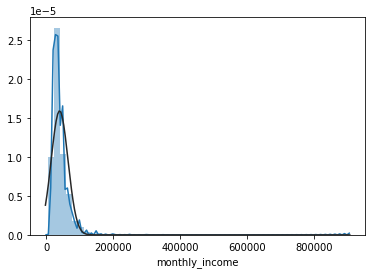

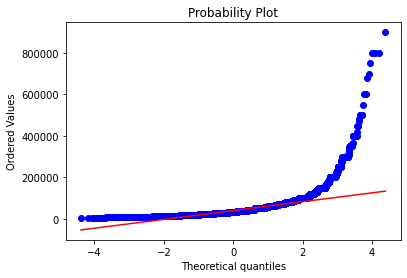

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

# строим гистограмму распределения и график
# квантиль-квантиль для переменной monthly_income
sns.distplot(train['monthly_income'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['monthly_income'], plot=plt)

Для распределения, скошенного вправо (положительный коэффициент асимметрии), обычно применяются следующие преобразования: квадратный корень, кубический корень, свернутый корень и логарифм. Для распределения, скошенного влево (отрицательный коэффициент асимметрии), обычно применяются следующие преобразования: квадратный корень (константа – x), кубический корень (константа – x) и логарифм (константа – x). Поскольку логарифм нуля, а равно и любого отрицательного числа, неопределен, перед использованием логарифмического преобразования ко всем значениям нужно добавить константу, чтобы сделать их положительными. При использовании корней обычно корень берут от модуля числа (чтобы не вычислять корни отрицательных чисел) и затем учитывают знак числа.

In [76]:
# вычисляем коэффициент асимметрии
print(train['monthly_income'].skew())

# вычисляем коэффициент эксцесса
print(train['monthly_income'].kurtosis())

5.170662523993356
81.08485953358395


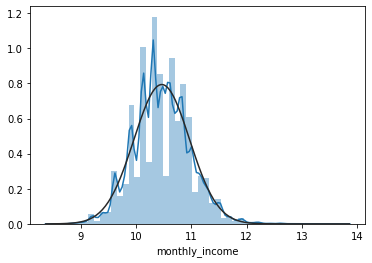

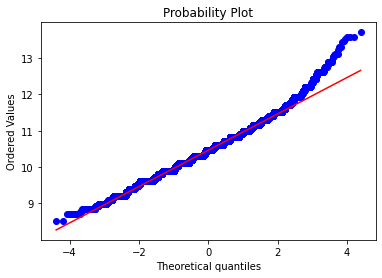

In [77]:
#логарифмическое  преобразование для переменной monthly_income
a = 0.001
sns.distplot(np.log(train['monthly_income'] + a), fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(train['monthly_income'] + a), plot=plt)

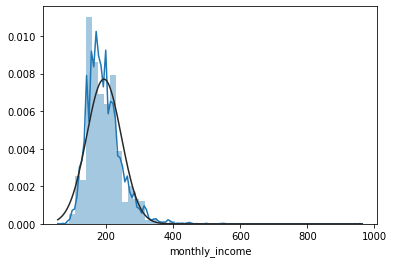

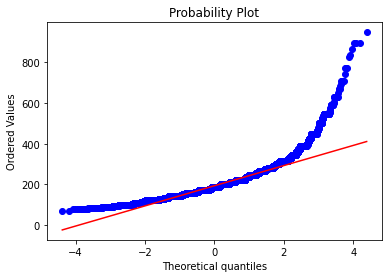

In [78]:
#преобразование 
# квадратным корнем для переменной monthly_income,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа

sns.distplot(np.sign(train['monthly_income']) *  
             (train['monthly_income'].abs() ** (1/2)), fit=norm)
fig = plt.figure()
res = stats.probplot(np.sign(train['monthly_income']) * 
                     (train['monthly_income'].abs() ** (1/2)), plot=plt)

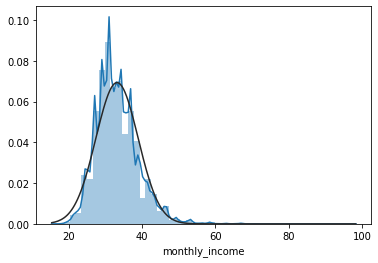

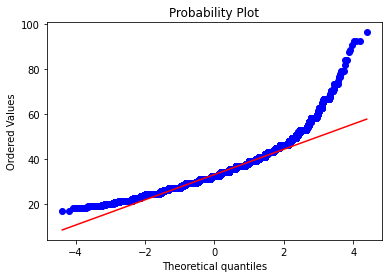

In [79]:
#преобразование 
# кубическим корнем для переменной monthly_income,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['monthly_income']) * 
             (train['monthly_income'].abs() ** (1/3)), fit=norm)
fig = plt.figure()
res = stats.probplot(np.sign(train['monthly_income']) * 
                     (train['monthly_income'].abs() ** (1/3)), plot=plt)

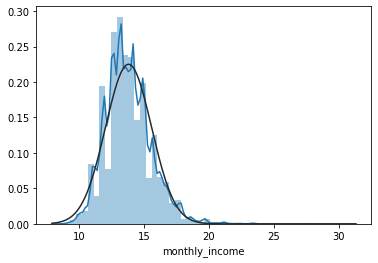

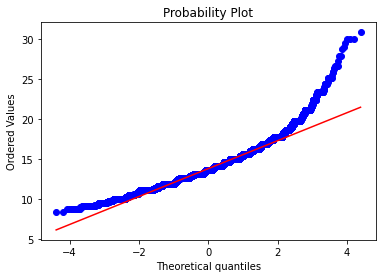

In [80]:
#преобразование 
# свернутым корнем для переменной monthly_income, 
# используем модуль, чтобы не вычислять корни 
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['monthly_income']) * 
             np.sqrt(np.sqrt(train['monthly_income'].abs())), fit=norm)
fig = plt.figure()
res = stats.probplot(np.sign(train['monthly_income']) * 
                     np.sqrt(np.sqrt(train['monthly_income'].abs())), plot=plt)

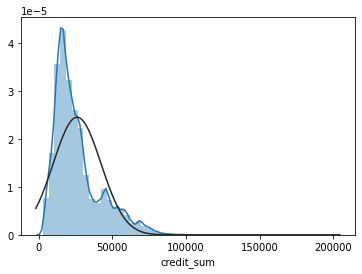

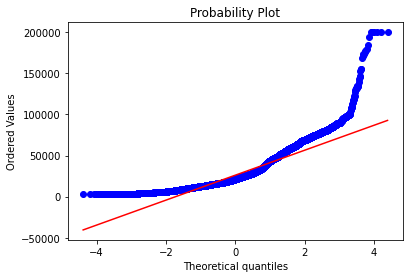

In [81]:
# строим гистограмму распределения и график
# квантиль-квантиль для переменной credit_sum
sns.distplot(train['credit_sum'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['credit_sum'], plot=plt)

Преобразование Бокса-Кокса представляет собой целое семейство преобразований. При lambda = -1 выполняется обратное преобразование. При lambda = -0,5 выполняется преобразование обратного квадратного корня. При lambda = 0 выполняется логарифмическое преобразование. При lambda = 0,5 выполняется преобразование квадратного корня. При lambda = 1 преобразование не выполняется.

В данном случае наше значение 0,04, будет выполнено логарифмическое преобразование. Давайте построим гистограмму и график Q-Q для переменной, к которой было применено преобразование Бокса-Кокса.


In [82]:
# импортируем функцию boxcox
from scipy.stats import boxcox
# выполняем преобразование Бокса-Кокса
transformed, lam = boxcox(train['credit_sum'])
print('Lambda: %f' % lam)

Lambda: 0.038149


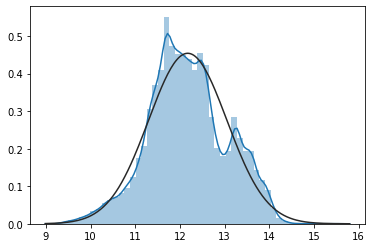

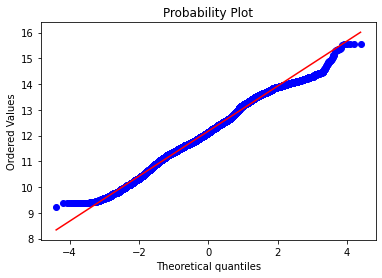

In [83]:
# строим гистограмму распределения и график
# квантиль-квантиль для переменной monthly_income,
# преобразованной с помощью Бокса-Кокса
sns.distplot(transformed, fit=norm)
fig = plt.figure()
res = stats.probplot(transformed, plot=plt)

In [84]:
# выполняем логарифмическое преобразование 
# указанных переменных
train['credit_sum'] = np.log(train['credit_sum'] + a)
train['monthly_income'] = np.log(train['monthly_income'] + a)
train['age'] = np.log(train['age'] + a)

test['credit_sum'] = np.log(test['credit_sum'] + a)
test['monthly_income'] = np.log(test['monthly_income'] + a)
test['age'] = np.log(test['age'] + a)

### Биннинг

In [85]:
# минимальное и максимальное значения
print(train['credit_sum'].min())
print(train['credit_sum'].max())

7.9142526442394505
12.206072650530174


In [86]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной credsumcat
bins = [-np.inf, 9.5, 10, 11, np.inf]
# осуществляем биннинг переменной credit_sum и записываем
# результаты в новую переменную credsumcat
train['credsumcat'] = pd.cut(train['credit_sum'], bins).astype('object')

In [87]:
# строим таблицу сопряженности credsumcat * open_account_flg
biv = pd.crosstab(train['credsumcat'], train['open_account_flg'])
biv

open_account_flg,0,1
credsumcat,,
"(-inf, 9.5]",17864,4950
"(9.5, 10.0]",32588,7207
"(10.0, 11.0]",42824,8112
"(11.0, inf]",5227,750


$WoE_i = ln(\frac{F_i^0}{F_i^1})$

где:
- $i$ – категория переменной;
- $ln$ – натуральный логарифм;
- $F_i^0$  –  относительная частота отрицательного класса (класса 0);
- $F_i^1$  –  относительная частота положительного класса (класса 1).

При работе с WoE, нужно придерживаться нескольких правил:
- необходимо создавать не более 10 категорий;
- пропущенные значения группируются в отдельную категорию;
- каждая категория должна содержать не менее 5% наблюдений; 
- категории не должны содержать нулевого количества событий или не-событий.

В идеале WOE непропущенных значений должно быть монотонным, восходя от отрицательных значений к положительным или наоборот, без смены зависимости на обратную. 

In [88]:
# пишем функцию, которая вычисляет WoE для 
# каждой категории выбранной переменной, 
# при этом используем умножение на 1.0,
# чтобы преобразовать во float и добавляем
# a=0.0001, чтобы избежать деления на 0
def WoE(df, feature, target):
    biv = pd.crosstab(df[feature], df[target].astype('str'))
    a = 0.0001
    WoE = np.log((1.0 * biv['0'] / sum(biv['0']) + a) / (1.0 * biv['1'] / sum(biv['1']) + a))
    return WoE    

In [89]:
# вычисляем WoE для каждой категории переменной monthcat
WoE(train, 'credsumcat', 'open_account_flg')

credsumcat
(-inf, 9.5]    -0.261
(9.5, 10.0]    -0.036
(10.0, 11.0]    0.119
(11.0, inf]     0.396
dtype: float64

In [90]:
from woe import *

In [91]:
woe = WoE(qnt_num=10, min_block_size=10, v_type='c', t_type='b')
# обучаем модель - вычисляем WoE
woe.fit(train['credit_sum'], train['open_account_flg'].astype('int'))

In [92]:
# выполняем WoE-трансформацию переменной credit_sum
woe.transform(train['credit_sum'])
# выводим информацию о бинах
print(woe.bins)

    mean   bad    obs  good    woe   bins labels
0  0.274  2976  10871  7895 -0.569   -inf      0
1  0.168  1826  10879  9053  0.056  9.239      1
2  0.151  1639  10849  9210  0.182  9.481      2
3  0.177  1928  10866  8938 -0.011  9.639      3
4  0.200  2168  10866  8698 -0.155  9.758      4
5  0.196  2125  10864  8739 -0.131  9.895      5
6  0.182  1974  10871  8897 -0.039 10.038      6
7  0.162  1759  10878  9119  0.101 10.180      7
8  0.181  1965  10846  8881 -0.036 10.324      8
9  0.127  1380  10866  9486  0.383 10.602      9
10 0.118  1279  10866  9587  0.470 10.869     10


In [93]:
# улучшаем монотонность
woe_monotonic = woe.force_monotonic(hypothesis=0)
print(woe_monotonic.bins)

   mean    bad    obs   good    woe   bins labels
0 0.274   2976  10871   7895 -0.569   -inf      0
1 0.179  11660  65195  53535 -0.020  9.239      1
2 0.171   3724  21724  18000  0.031 10.180      2
3 0.127   1380  10866   9486  0.383 10.602      3
4 0.118   1279  10866   9587  0.470 10.869      4


In [94]:
# выполняем биннинг по WoE с оптимизацией по AUC
# (используется дерево CART)
woe2 = woe.optimize(max_depth=3, scoring='roc_auc', cv=5)
print(woe2.bins)

   mean    bad    obs   good    woe   bins labels
0 0.317   1460   4605   3145 -0.777   -inf      0
1 0.243   1509   6206   4697 -0.409  8.893      1
2 0.177  15652  88557  72905 -0.006  9.237      2
3 0.119   2398  20154  17756  0.457 10.652      3


$IV_i = {(F_i^0 - F_i^1)}{\ln(\frac{F_i^0}{F_i^1})}$

In [95]:
# пишем функцию, которая вычисляет IV для 
# каждой категории выбранной переменной, 
# при этом используем умножение на 1.0,
# чтобы преобразовать во float и добавляем a=0.0001, 
# чтобы избежать деления на 0
def IV_cat(df, feature, target):
    biv = pd.crosstab(df[feature], df[target].astype('str'))
    a = 0.0001
    IV_cat = ((1.0 * biv['0'] / sum(biv['0']) + a) - 
              (1.0 * biv['1'] / sum(biv['1']) + a)) * np.log(
        (1.0 * biv['0'] / sum(biv['0']) + a) / (1.0 * biv['1'] / sum(biv['1']) + a))
    return IV_cat

In [96]:
# вычисляем IV для каждой категории переменной credsumcat
IV_cat(train, 'credsumcat', 'open_account_flg')

credsumcat
(-inf, 9.5]    0.014
(9.5, 10.0]    0.000
(10.0, 11.0]   0.006
(11.0, inf]    0.007
dtype: float64

Итоговое информационное значение используется для измерения прогнозной силы переменной в целом, для этого информационные значения, вычисленные по каждой категории, складываются.

$IV = \sum_{i = 1}^k(F_i^0 - F_i^1)ln(\frac{F_i^0}{F_i^1})$

Информационное значение всегда является положительной величиной. При интерпретации итоговых значений IV руководствуются правилом: 
- меньше 0.02 – характеристика не обладает предсказательной способностью;
- от 0.02 до 0.1 – слабая предсказательная способность;
- от 0.1 до 0.3 – средняя предсказательная способность;
- 0.3 и выше – высокая предсказательная способность. 
Значения IV более 0.5 обычно вызывают подозрения («слишком хорошо, чтобы быть правдой») и нуждаются в дополнительной проверке.

In [97]:
# удаляем переменную credsumcat
train.drop('credsumcat', axis=1, inplace=True)

In [98]:
# пишем функцию, вычисляющую IV по всем 
# количественным предикторам
def numeric_IV(df): 
    # создаем список, в который будем записывать IV
    iv_list = []
    # создаем копию датафрейма
    df = df.copy()
    # записываем константу, которую будем добавлять,
    # чтобы избежать деления на 0
    a= 0.0001
    # задаем зависимую переменную
    target = df['open_account_flg'].astype('str')
    # отбираем столбцы, у которых больше 10 уникальных значений
    df = df.loc[:, df.apply(pd.Series.nunique) > 10]
    # из этих столбцов отбираем только количественные
    numerical_columns = df.select_dtypes(include=['number']).columns
    # запускаем цикл, который вычисляет IV по каждой 
    # выбранной переменной
    for var_name in numerical_columns:
        # разбиваем переменную на 10 квантилей
        df[var_name] = pd.qcut(df[var_name].values, 10, duplicates='drop').codes
        # строим таблицу сопряженности между категоризированной 
        # переменной и зависимой переменной
        biv = pd.crosstab(df[var_name], target)        
        # вычисляем IV на основе таблицы сопряженности
        IV = sum(((1.0 * biv['0'] / sum(biv['0']) + a) - 
                  (1.0 * biv['1'] / sum(biv['1']) + a)) * np.log(
            (1.0 * biv['0'] / sum(biv['0']) + a) / (1.0 * biv['1'] / sum(biv['1']) + a)))
        # добавляем вычисленное IV в список, где хранятся IV
        iv_list.append(IV)
    # создаем список с названиями столбцов
    col_list = list(numerical_columns)
    # создаем датафрейм с двумя столбцами, в одном - названия переменных,
    # в другом - IV этих переменных
    result = pd.DataFrame({'Название переменной' : col_list,'IV' : iv_list})
    # добавляем дополнительный столбец "Полезность", задаем строковые значения,
    # которые будут выводится в зависимости от величины IV
    result['Полезность'] = ['Подозрительно высокая' if x > 0.5 else 'Сильная' 
                            if x <= 0.5 and x > 0.3 else 'Средняя'
                            if x <= 0.3 and x > 0.1 else 'Слабая' 
                            if x <= 0.1 and x > 0.02 else 'Бесполезная' 
                            for x in result['IV']]  # по Наиму Сиддики
    # возвращаем датафрейм, отсортированный по убыванию IV
    return(result.sort_values(by='IV', ascending=False))

In [99]:
numeric_IV(train)

,Название переменной,IV,Полезность
6,tariff,0.143,Средняя
1,credit_sum,0.066,Слабая
0,age,0.062,Слабая
2,credit_month,0.038,Слабая
3,score_shk,0.021,Слабая
5,credit_count,0.015,Бесполезная
4,monthly_income,0.006,Бесполезная


In [100]:
from sklearn.ensemble import RandomForestClassifier

# выполняем дамми-кодирование
train_dum = pd.get_dummies(train)
# создаем обучающий массив меток
y_training = train_dum.loc[:, 'open_account_flg_1']
# удаляем из будущего массива признаков результаты
# дамми-кодирования зависимой переменной -
# open_account_flg_0 и open_account_flg_1
train_dum.drop(['open_account_flg_0', 'open_account_flg_1'], axis=1, inplace=True)
# создаем обучающий массив признаков
X_training = train_dum.loc[:, 'age':'ind_1']
# создаем экземпляр класса RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50, max_depth=17, random_state=152, n_jobs=-1)
# строим модель
forest.fit(X_training, y_training)
# cоздаем объект с названиями предикторов
feat_labels = X_training.columns
# cоздаем объект со значениями важностей, вычисленными моделью forest
importances = forest.feature_importances_
# задаем сортировку значений важности и сопоставляем названия предикторов важностям
indices = np.argsort(importances)[::-1]
for f in range(X_training.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 35,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) credit_sum                          0.098495
 2) score_shk                           0.092383
 3) age                                 0.077462
 4) tariff_id_1_32                      0.076753
 5) credit_month                        0.073631
 6) tariff                              0.069549
 7) monthly_income                      0.051969
 8) ind_0                               0.030982
 9) credit_count                        0.030667
10) ind_1                               0.029988
11) tariff_id_1_1                       0.021287
12) education_GRD                       0.020351
13) education_SCH                       0.018762
14) job_position_PNA                    0.017455
15) marital_status_MAR                  0.014157
16) gender_M                            0.012427
17) marital_status_UNM                  0.012053
18) job_position_SPC                    0.011185
19) gender_F                            0.010907
20) tariff_id_1_6                       0.007701
21) living_region_МО

In [101]:
# воспользуемся функцией feature_importance_permutation 
# библиотеки mlxtend от Себастьяна Рашки
from mlxtend.evaluate import feature_importance_permutation

In [102]:
# выполняем дамми-кодирование контрольного набора
test_dum = pd.get_dummies(test)
# создаем контрольный массив меток
y_testing = test_dum.loc[:, 'open_account_flg_1']
# удаляем из будущего массива признаков результаты
# дамми-кодирования зависимой переменной -
# open_account_flg_0 и open_account_flg_1
test_dum.drop(['open_account_flg_0', 'open_account_flg_1'], axis=1, inplace=True)
# создаем контрольный массив признаков
X_testing = test_dum.loc[:, 'age':'ind_1']

In [103]:
%%time
# вычисляем пермутированные важности
imp_vals, _ = feature_importance_permutation(
    predict_method=forest.predict, 
    X=X_testing.values,
    y=y_testing.values,
    metric='accuracy',
    num_rounds=10,
    seed=1)

CPU times: user 15min 49s, sys: 9.54 s, total: 15min 58s
Wall time: 2min 47s


In [104]:
# выводим пермутированные важности
indices = np.argsort(imp_vals)[::-1]
for f in range(X_training.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 60,
                            feat_labels[indices[f]],
                            imp_vals[indices[f]]))

 1) ind_0                                                        0.002001
 2) ind_1                                                        0.001579
 3) age                                                          0.001341
 4) credit_month                                                 0.001324
 5) credit_sum                                                   0.001150
 6) tariff                                                       0.001111
 7) education_GRD                                                0.000798
 8) tariff_id_1_32                                               0.000775
 9) education_SCH                                                0.000693
10) tariff_id_1_1                                                0.000506
11) job_position_PNA                                             0.000433
12) marital_status_MAR                                           0.000404
13) tariff_id_1_6                                                0.000381
14) job_position_SPC                  

In [105]:
# воспользуемся пакетом CHAID для биннинга
# категориальной переменной tariff_id,
# предварительно установив его в Anaconda Promt 
# с помощью команды pip install CHAID
from CHAID import Tree
# задаем название предиктора
independent_variable = 'tariff_id'
# задаем название зависимой переменной
dep_variable = 'open_account_flg'
# создаем словарь, где ключом будет название
# предиктора, а значением - тип переменной
dct = {independent_variable: 'nominal'}

In [106]:
# строим дерево CHAID и выводим его
tree = Tree.from_pandas_df(train, dct, dep_variable, max_depth=1)
tree.print_tree()

([], {0: 98503.0, 1: 21019.0}, (tariff_id, p=0.0, score=4912.276428995799, groups=[['1_0', '1_9'], ['1_1', '1_17'], ['1_16', '1_5', '1_2', '1_7', '1_94'], ['1_18'], ['1_19', '1_4'], ['1_21', '1_22', '1_23', '1_99'], ['1_24', '1_25', '1_6'], ['1_3', '1_41', '1_91'], ['1_32'], ['1_43', '1_44']]), dof=9))
|-- (['1_0', '1_9'], {0: 5069.0, 1: 359.0}, <Invalid Chaid Split> - the max depth has been reached)
|-- (['1_1', '1_17'], {0: 39687.0, 1: 9244.0}, <Invalid Chaid Split> - the max depth has been reached)
|-- (['1_16', '1_5', '1_2', '1_7', '1_94'], {0: 8504.0, 1: 940.0}, <Invalid Chaid Split> - the max depth has been reached)
|-- (['1_18'], {0: 2.0, 1: 21.0}, <Invalid Chaid Split> - the minimum parent node size threshold has been reached)
|-- (['1_19', '1_4'], {0: 8060.0, 1: 1053.0}, <Invalid Chaid Split> - the max depth has been reached)
|-- (['1_21', '1_22', '1_23', '1_99'], {0: 928.0, 1: 36.0}, <Invalid Chaid Split> - the max depth has been reached)
|-- (['1_24', '1_25', '1_6'], {0: 238

### Новые признаки

In [107]:
# создаем переменную paym, которая 
# является отношением выданной суммы кредита 
# (credit_sum) к сроку кредита (credit_month), 
# то есть ежемесячной суммой кредита
train['paym'] = train['credit_sum'] / train['credit_month']
test['paym'] = test['credit_sum'] / test['credit_month']

# заменяем бесконечные значения на 1
train['paym'].replace([np.inf, -np.inf], 1, inplace=True)
test['paym'].replace([np.inf, -np.inf], 1, inplace=True)

# создаем переменную pti, которая является 
# отношением ежемесячной суммы кредита 
# (paym) к ежемесячному заработку 
# (monthly_income) 
train['pti'] = train['paym'] / train['monthly_income']
test['pti'] = test['paym'] / test['monthly_income']

# заменяем бесконечные значения на 1
train['pti'].replace([np.inf, -np.inf], 1, inplace=True)
test['pti'].replace([np.inf, -np.inf], 1, inplace=True)

# создаем новые переменные, возведя некоторые
# количественные переменные в квадрат
train['tariff_sq'] = train['tariff']**2
test['tariff_sq'] = test['tariff']**2

train['age_sq'] = train['age']**2
test['age_sq'] = test['age']**2

train['credit_sum_sq'] = train['credit_sum']**2
test['credit_sum_sq'] = test['credit_sum']**2

train['score_sq'] = train['score_shk']**2
test['score_sq'] = test['score_shk']**2

train['income_sq'] = train['monthly_income']**2
test['income_sq'] = test['monthly_income']**2

train['credit_month_sq'] = train['credit_month']**2
test['credit_month_sq'] = test['credit_month']**2

train['credit_count_sq'] = train['credit_count']**2
test['credit_count_sq'] = test['credit_count']**2

In [108]:
# пишем функцию, выполняющую биннинг
def user_bin(df, number):    
    # увеличиваем максимальную ширину столбца
    pd.set_option('max_colwidth', 800) 
    # задаем список, где будут хранится IV
    iv_list = []
    # задаем список, где будет хранится информация о количестве бинов
    bins_list = [] 
    # задаем список, где будет хранится информация о бинах
    groups_list = []  
    # записываем константу, которую будем добавлять,
    # чтобы избежать деления на 0
    a = 0.0001
    # задаем зависимую переменную
    target = df['open_account_flg'].astype('str')
    # отбираем столбцы, у которых больше 10 уникальных значений
    df = df.loc[:, df.apply(pd.Series.nunique) > 10]
    # из этих столбцов отбираем только количественные
    numerical_columns = df.select_dtypes(include=['number']).columns    
    # запускаем цикл, который вычисляет IV по каждой 
    # выбранной переменной
    for var_name in numerical_columns:  
        # фиксируем количество бинов
        num = number
        # создаем точки разбиения
        bins = np.linspace(df[var_name].min(), df[var_name].max(), num) 
        # округляем значения точек разбиения
        rounded_bins = np.round(bins, 2)
        # создаем бины
        groups = np.digitize(df[var_name], rounded_bins)
        # строим таблицу сопряженности между категоризированной 
        # переменной и зависимой переменной
        biv = pd.crosstab(groups, target)
        # вычисляем IV на основе таблицы сопряженности        
        IV = sum(((1.0 * biv['0'] / sum(biv['0']) + a) - 
                  (1.0 * biv['1'] / sum(biv['1']) + a)) * np.log(
            (1.0 * biv['0'] / sum(biv['0']) + a) / (1.0 * biv['1'] / sum(biv['1']) + a)))
        # добавляем вычисленное IV в список, где хранятся IV
        iv_list.append(IV) 
        # добавляем информацию о количестве бинов в список, где хранится
        # информация о количестве бинов
        bins_list.append(num)
        # добавляем бины в список, где хранится 
        # информация о бинах
        groups_list.append(rounded_bins)
    # создаем список с названиями столбцов    
    col_list = list(numerical_columns) 
    # создаем датафрейм с четырьмя столбцами, в первом - названия переменных,
    # во втором - бины, в третьем - IV, в четвертом - количество бинов
    result = pd.DataFrame({'Переменная' : col_list, 
                           'Бины': groups_list, 
                           'IV' : iv_list,
                           'Количество_бинов' : bins_list})    
    # возвращаем датафрейм, отсортированный по убыванию IV
    return(result.sort_values(by='IV', ascending=False))

In [109]:
# разбиваем все количественные переменные 
# на 10 категорий и смотрим IV
user_bin(train, 10)

,Переменная,Бины,IV,Количество_бинов
6,tariff,"[1.0, 1.11, 1.22, 1.33, 1.44, 1.55, 1.66, 1.77, 1.88, 1.99]",0.211,10
9,tariff_sq,"[1.0, 1.33, 1.66, 1.99, 2.32, 2.64, 2.97, 3.3, 3.63, 3.96]",0.146,10
2,credit_month,"[3.0, 6.67, 10.33, 14.0, 17.67, 21.33, 25.0, 28.67, 32.33, 36.0]",0.093,10
10,age_sq,"[8.35, 9.45, 10.54, 11.63, 12.72, 13.81, 14.9, 15.99, 17.08, 18.17]",0.080,10
0,age,"[2.89, 3.04, 3.2, 3.35, 3.5, 3.65, 3.81, 3.96, 4.11, 4.26]",0.076,10
1,credit_sum,"[7.91, 8.39, 8.87, 9.34, 9.82, 10.3, 10.78, 11.25, 11.73, 12.21]",0.065,10
7,paym,"[0.24, 0.65, 1.05, 1.46, 1.87, 2.27, 2.68, 3.09, 3.49, 3.9]",0.062,10
11,credit_sum_sq,"[62.64, 72.23, 81.82, 91.42, 101.01, 110.61, 120.2, 129.8, 139.39, 148.99]",0.060,10
8,pti,"[0.02, 0.06, 0.1, 0.15, 0.19, 0.23, 0.27, 0.31, 0.35, 0.39]",0.037,10
12,score_sq,"[0.0, 0.14, 0.28, 0.42, 0.57, 0.71, 0.85, 0.99, 1.13, 1.27]",0.023,10


In [110]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной monthcat
bins = [-np.inf, 7.95, 9.6, 11.25, 13.725, 14.55,
        17.85, 20.325, 23.625, 24.45, 26.925, np.inf]
# осуществляем биннинг переменной credit_month и записываем
# результаты в новую переменную monthcat
train['monthcat'] = pd.cut(train['credit_month'], bins).astype('object')
test['monthcat'] = pd.cut(test['credit_month'], bins).astype('object')

# задаем точки, в которых будут находится границы категорий 
# будущей переменной agecat
bins = [-np.inf, 3.09, 3.28, 3.48, 3.67, 3.87, 4.07, np.inf]
# осуществляем биннинг переменной age и записываем
# результаты в новую переменную agecat
train['agecat'] = pd.cut(train['age'], bins).astype('object')
test['agecat'] = pd.cut(test['age'], bins).astype('object')

# задаем точки, в которых будут находится границы категорий 
# будущей переменной credsumcat
bins = [-np.inf, 8.3, 8.69, 9.08, 9.47, 9.87, 10.26, 
        10.65, 11.04, 11.43, 11.82, np.inf]
# осуществляем биннинг переменной credit_sum и записываем
# результаты в новую переменную credsumcat
train['credsumcat'] = pd.cut(train['credit_sum'], bins).astype('object')
test['credsumcat'] = pd.cut(test['credit_sum'], bins).astype('object')

# задаем точки, в которых будут находится границы категорий
# будущей переменной paymcat
bins = [-np.inf, 0.57, 0.91, 1.24, 1.57, 1.9, 2.24, 
        2.57, 2.9, 3.23, 3.57, np.inf]
# осуществляем биннинг переменной paym и записываем
# результаты в новую переменную paymcat
train['paymcat'] = pd.cut(train['paym'], bins).astype('object')
test['paymcat'] = pd.cut(test['paym'], bins).astype('object')

# создаем переменную match, если количество просроченных
# кредитов совпадает с количеством кредитов, переменная
# принимает значение 1, если не совпадает, принимает значение 0
train['match'] = np.where(
    train['overdue_credit_count'] == train['credit_count'], 1, 0).astype('object')
test['match'] = np.where(
    test['overdue_credit_count'] == test['credit_count'], 1, 0).astype('object')

### Масштабирование признаков

In [111]:
# При помощи StandardScaler автоматически. Обучаем только на X_train, y_train не используется.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_tst_scaled = scaler.transform(X_test)

Важнейшей предпосылкой регрессионного анализа является единый масштаб измерения переменных. Давайте отмасштабируем переменные. Самое простое масштабирование подразумевает, что из каждого значения переменной мы вычтем среднее значение и полученный результат разделим на стандартное отклонение:

$$\frac{\Large x_i - mean(x)}{\Large stdev(x)}$$

Еще мы можем из каждого значения переменной вычесть минимальное значение и полученный результат разделить на ширину диапазона (разницу между минимальным и максимальным значениями):

$$\frac{\Large x_i - min(x)}{\Large max(x)-min(x)}$$

В итоге мы сжимаем значения переменных в диапазон от 0 до 1 (или от -1 до 1, если есть отрицательные значения). Если распределение не является нормальным или стандартное отклонение является очень маленьким, этот способ сработает лучше.

Данные виды стандартизации чувствительны к выбросам, поэтому если данные содержат выбросы, стандартизация с использованием межквартильного размаха может дать лучший результат. Вместо ширины диапазона используется межквартильный размах. В основе выполняемого преобразования лежит следующая формула:

$$\frac{\Large x_i - Q_1(x)}{\Large Q_3(x)-Q_1(x)}$$

In [112]:
# Вручную
# выделяем количественные переменные в отдельный список
num_cols = [c for c in train.columns if train[c].dtype.name != 'object']
# создаем копию обучающего набора
train_copy = train.copy()
# выполняем стандартизацию
for i in num_cols:    
    train[i] = (train[i] - train[i].mean()) / train[i].std()
    test[i] = (test[i] - train_copy[i].mean()) / train_copy[i].std()

In [113]:
# убеждаемся в отсутствии пропусков в переменных
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119522 entries, 53397 to 149270
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gender                119522 non-null  object 
 1   age                   119522 non-null  float64
 2   marital_status        119522 non-null  object 
 3   job_position          119522 non-null  object 
 4   credit_sum            119522 non-null  float64
 5   credit_month          119522 non-null  float64
 6   tariff_id             119522 non-null  object 
 7   score_shk             119522 non-null  float64
 8   education             119522 non-null  object 
 9   living_region         119522 non-null  object 
 10  monthly_income        119522 non-null  float64
 11  credit_count          119522 non-null  float64
 12  overdue_credit_count  119522 non-null  float64
 13  open_account_flg      119522 non-null  object 
 14  tariff                119522 non-null  float64
 

In [114]:
# Дамми-кодирование
# печатаем названия столбцов до и после
# дамми-кодирования
print("Исходные переменные:\n", list(train.columns), "\n")
train_dumm = pd.get_dummies(train)

print("Исходные переменные:\n", list(test.columns), "\n")
test_dumm = pd.get_dummies(test)

Исходные переменные:
 ['gender', 'age', 'marital_status', 'job_position', 'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education', 'living_region', 'monthly_income', 'credit_count', 'overdue_credit_count', 'open_account_flg', 'tariff', 'ind', 'paym', 'pti', 'tariff_sq', 'age_sq', 'credit_sum_sq', 'score_sq', 'income_sq', 'credit_month_sq', 'credit_count_sq', 'monthcat', 'agecat', 'credsumcat', 'paymcat', 'match'] 

Исходные переменные:
 ['gender', 'age', 'marital_status', 'job_position', 'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education', 'living_region', 'monthly_income', 'credit_count', 'overdue_credit_count', 'open_account_flg', 'tariff', 'ind', 'paym', 'pti', 'tariff_sq', 'age_sq', 'credit_sum_sq', 'score_sq', 'income_sq', 'credit_month_sq', 'credit_count_sq', 'monthcat', 'agecat', 'credsumcat', 'paymcat', 'match'] 



In [115]:
# создаем обучающий и контрольный массивы меток
y_tr = train_dumm.loc[:, 'open_account_flg_1']
y_tst = test_dumm.loc[:, 'open_account_flg_1']
# удаляем из будущих массивов признаков результаты
# дамми-кодирования зависимой переменной -
# open_account_flg_0 и open_account_flg_1
train_dumm.drop(['open_account_flg_0', 'open_account_flg_1'], axis=1, inplace=True)
test_dumm.drop(['open_account_flg_0', 'open_account_flg_1'], axis=1, inplace=True)
# создаем обучающий и контрольный массивы признаков
X_tr = train_dumm.loc[:, 'age':'match_1']
X_tst = test_dumm.loc[:, 'age':'match_1']

In [116]:
%time
# строим модель логистической регрессии
logreg = LogisticRegression().fit(X_tr, y_tr)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_tr, logreg.predict_proba(X_tr)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_tst, logreg.predict_proba(X_tst)[:, 1])))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs
AUC на обучающей выборке: 0.757
AUC на контрольной выборке: 0.759


In [117]:
# запишем коэффициенты, предварительно округлив до 3-го знака, 
# и названия предикторов в отдельные объекты
coef = np.round(logreg.coef_, 3)
feat_labels = X_tr.columns

# запишем свободный член (константу) в отдельный объект, при этом
# переводим массив, полученный с помощью атрибута intercept_, 
# в скаляр с округлением до 3-го знака
intercept = np.round(np.asscalar(logreg.intercept_), 3)

# печатаем название "Константа"    
print("Константа:", intercept)
# печатаем название "Регрессионные коэффициенты"
print("Регрессионные коэффициенты:")
# для удобства сопоставим каждому названию 
# предиктора соответствующий коэффициент
for c, feature in zip(coef[0], feat_labels):
    print(feature, c)

Константа: -0.153
Регрессионные коэффициенты:
age -0.544
credit_sum -0.417
credit_month 0.201
score_shk -0.449
monthly_income -0.286
credit_count 0.041
overdue_credit_count 0.046
tariff -0.117
paym 0.357
pti -0.266
tariff_sq 0.004
age_sq 0.4
credit_sum_sq 0.223
score_sq 0.713
income_sq 0.26
credit_month_sq -0.103
credit_count_sq 0.067
gender_F -0.215
gender_M 0.076
marital_status_CIV 0.065
marital_status_DIV 0.028
marital_status_MAR -0.257
marital_status_UNM -0.016
marital_status_WID 0.041
job_position_ATP 0.074
job_position_BIS -0.29
job_position_BIU 0.249
job_position_DIR -0.346
job_position_INP 0.211
job_position_NOR 0.371
job_position_OTHER 0.276
job_position_PNA 0.718
job_position_PNI 0.261
job_position_SPC -0.407
job_position_UMN -0.202
job_position_WOI -0.167
job_position_WRK -0.638
job_position_WRP -0.249
tariff_id_1_0 -0.798
tariff_id_1_1 0.156
tariff_id_1_16 0.345
tariff_id_1_17 0.208
tariff_id_1_18 1.378
tariff_id_1_19 0.354
tariff_id_1_2 -0.24
tariff_id_1_21 -0.988
tariff_i

In [118]:
# вычислим экспоненциальные коэффициенты
# и запишем их в отдельный объект
exp_coef = np.round(np.exp(coef), 3)

# печатаем название "Константа"    
print("Константа:", intercept)
# печатаем название "Экспонециальные коэффициенты"
print("Экспоненциальные коэффициенты:")
# для удобства сопоставим каждому названию 
# предиктора соответствующий коэффициент
for c, feature in zip(exp_coef[0], feat_labels):
    print(feature, c)

Константа: -0.153
Экспоненциальные коэффициенты:
age 0.58
credit_sum 0.659
credit_month 1.223
score_shk 0.638
monthly_income 0.751
credit_count 1.042
overdue_credit_count 1.047
tariff 0.89
paym 1.429
pti 0.766
tariff_sq 1.004
age_sq 1.492
credit_sum_sq 1.25
score_sq 2.04
income_sq 1.297
credit_month_sq 0.902
credit_count_sq 1.069
gender_F 0.807
gender_M 1.079
marital_status_CIV 1.067
marital_status_DIV 1.028
marital_status_MAR 0.773
marital_status_UNM 0.984
marital_status_WID 1.042
job_position_ATP 1.077
job_position_BIS 0.748
job_position_BIU 1.283
job_position_DIR 0.708
job_position_INP 1.235
job_position_NOR 1.449
job_position_OTHER 1.318
job_position_PNA 2.05
job_position_PNI 1.298
job_position_SPC 0.666
job_position_UMN 0.817
job_position_WOI 0.846
job_position_WRK 0.528
job_position_WRP 0.78
tariff_id_1_0 0.45
tariff_id_1_1 1.169
tariff_id_1_16 1.412
tariff_id_1_17 1.231
tariff_id_1_18 3.967
tariff_id_1_19 1.425
tariff_id_1_2 0.787
tariff_id_1_21 0.372
tariff_id_1_22 0.548
tariff

### GridSearchCV. Настройка параметров (регуляризация)

In [119]:
# импортируем класс GridSearchCV
from sklearn.model_selection import GridSearchCV
# создаем экземпляр класса LogisticRegression,
# логистическую регрессию с L1-регуляризацией
logreg_grid = LogisticRegression(penalty='l2')
# задаем сетку параметров, будем перебирать 
# разные значения штрафа
param_grid = {'C': [0.6, 0.7, 0.8]}
# задаем стратегию перекрестной проверки
stratcv = StratifiedKFold(n_splits=3)
# создаем экземпляр класса GridSearchCV
grid_search = GridSearchCV(logreg_grid, param_grid, 
                           scoring='roc_auc', 
                           n_jobs=-1, cv=stratcv)
# запускаем решетчатый поиск
grid_search.fit(X_tr, y_tr)
# проверяем модель со значением гиперпараметра C, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрестной
# проверки), на тестовой выборке
test_score = roc_auc_score(y_tst, grid_search.predict_proba(X_tst)[:, 1])
# смотрим результаты решетчатого поиска
print("AUC на тестовой выборке: {:.3f}".format(test_score))
print("Наилучшее значение гиперпараметра C: {}".format(grid_search.best_params_))
print("Наилучшее значение AUC: {:.3f}".format(grid_search.best_score_))

AUC на тестовой выборке: 0.759
Наилучшее значение гиперпараметра C: {'C': 0.6}
Наилучшее значение AUC: 0.754


## Построение логистической регрессии в библиотеке H2O

In [120]:
import h2o
import os
h2o.init(nthreads=-1, max_mem_size=8)

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-3ubuntu1); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-3ubuntu1, mixed mode, sharing)
  Starting server from /home/darean/.local/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmppasq74je
  JVM stdout: /tmp/tmppasq74je/h2o_darean_started_from_python.out
  JVM stderr: /tmp/tmppasq74je/h2o_darean_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_darean_q5lrqw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


In [121]:
# импортируем библиотеку для транслитерации
import cyrtranslit
# выполняем транслитерацию
train['living_region'] = train['living_region'].apply(lambda x: \
                                                      cyrtranslit.to_latin(x, 'ru'))
test['living_region'] = test['living_region'].apply(lambda x: \
                                                    cyrtranslit.to_latin(x, 'ru'))
# смотрим результаты транслитерации
print(train['living_region'].unique())
print(test['living_region'].unique())

['AMURSKAJA' "STAVROPOL'SKIJ" 'ROSTOVSKAJA' 'HAKASIJA' 'CHELJABINSKAJA'
 'SAHA/JAKUTIJA/' 'TATARSTAN' 'KARELIJA' 'KEMEROVSKAJA' 'NIZHEGORODSKAJA'
 'VOLGOGRADSKAJA' 'PRIMORSKIJ' 'KABARDINO-BALKARSKAJA' 'KRASNOJARSKIJ'
 'BASHKORTOSTAN' 'CHUVASHSKAJA' 'TVERSKAJA' 'RJAZANSKAJA' 'MOSKVA'
 'MOSKOVSKAJA' 'IRKUTSKAJA' 'SAMARSKAJA' 'OMSKAJA' 'VORONEZHSKAJA'
 'JAMALO-NENECKIJ' 'PERMSKIJ' 'SVERDLOVSKAJA' 'LENINGRADSKAJA'
 'KRASNODARSKIJ' 'PENZENSKAJA' 'HABAROVSKIJ' "TUL'SKAJA" 'SANKT-PETERBURG'
 'SARATOVSKAJA' 'HANTY-MANSIJSKIJ' 'KURGANSKAJA' 'KOMI' 'MURMANSKAJA'
 'KALUZHSKAJA' 'ORLOVSKAJA' 'KAMCHATSKIJ' "ZABAJKAL'SKIJ" 'NOVOSIBIRSKAJA'
 'TJUMENSKAJA' 'ORENBURGSKAJA' 'VOLOGODSKAJA' 'BELGORODSKAJA'
 'MAGADANSKAJA' 'KURSKAJA' 'MORDOVIJA' 'ADYGEJA' 'ASTRAHANSKAJA'
 'ALTAJSKIJ' 'JAROSLAVSKAJA' 'VLADIMIRSKAJA' 'MARIJEHL' 'TOMSKAJA'
 "ARHANGEL'SKAJA" 'IVANOVSKAJA' 'SAHALINSKAJA' 'EVREJSKAJA' 'BURJATIJA'
 'TAMBOVSKAJA' "UL'JANOVSKAJA" 'TYVA' 'KALININGRADSKAJA' 'KALMYKIJA'
 'UDMURTSKAJA' 'KOSTROMSKAJA' '

In [122]:
# в указанных переменных заменяем 
# значения 0 и 1 на No и Yes
for i in ['open_account_flg', 'ind', 'match']:
    train[i] = np.where(train[i] == 0, 'No', 'Yes')
    test[i] = np.where(test[i] == 0, 'No', 'Yes')

In [123]:
# преобразовываем датафреймы pandas во фреймы h2o -
# специальную структуру данных, используемую h2o
tr = h2o.H2OFrame(train)
valid = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [124]:
# взглянем на обучающий фрейм, обратите внимание, сейчас 
# метод .describe() - это метод h2o, а не pandas
tr.describe()

Rows:119522
Cols:30




,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,tariff,ind,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,monthcat,agecat,credsumcat,paymcat,match
type,enum,real,enum,enum,real,real,enum,real,enum,enum,real,real,real,enum,real,enum,real,real,real,real,real,real,real,real,real,enum,enum,enum,enum,enum
mins,,-2.372547187350605,,,-3.4612087704029824,-2.267902147055643,,-3.78327129491744,,,-3.879036011888127,-1.2128354426222705,-0.210266606010881,,-1.375101695128922,,-2.394987352764969,-2.416795938064837,-1.2298366059930257,-2.1710955545174055,-3.1348183472455693,-1.9349762639773564,-3.517701923770125,-1.0792987963955811,-0.5765439567672437,,,,,
mean,,1.6784745571066974e-15,,,-4.014927310645248e-15,2.123507515047504e-16,,-4.254148873930554e-16,,,-3.650150095854333e-15,-3.7393231437986564e-17,-9.987381369764297e-18,,1.052004170948506e-15,,5.521595128712547e-16,8.011306627318075e-16,-3.657283939689878e-16,1.1691181072487183e-15,-1.5206977109438733e-15,-1.3875326260136827e-16,-6.705813205413171e-17,2.87731701367019e-17,3.6382603561284225e-17,,,,,
maxs,,2.513134568891401,,,3.687277417703004,7.11456123231988,,5.3041181671076165,,,6.459151180055209,10.91659180177388,14.42659145085139,,2.8194380438055515,,9.376309750717407,10.050874894134312,3.263721349227984,2.6997967032431975,4.070198375057435,8.499961438110763,7.38547537585232,10.1356414802046,33.75134075885809,,,,,
sigma,,0.9999999999999997,,,0.9999999999999994,1.0000000000000004,,1.0000000000000007,,,0.9999999999999996,0.9999999999999998,1.0000000000000002,,1.0,,1.0000000000000002,1.0000000000000002,0.9999999999999998,1.0000000000000002,0.9999999999999998,0.9999999999999998,0.9999999999999996,0.9999999999999996,1.0000000000000007,,,,,
zeros,,0,,,0,0,,0,,,0,0,0,,0,,0,0,0,0,0,0,0,0,0,,,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,M,-0.7995604182441838,UNM,SPC,0.715140545163741,-0.27768264233962303,1_4,-0.3090467213463236,SCH,AMURSKAJA,0.05098281288839268,-0.057651895536922945,-0.210266606010881,No,0.3196618357536933,No,0.18221361005618167,0.16907669047860743,0.22748430783156395,-0.8068597969976958,0.7012396982513444,-0.409774307198754,0.02686239416048803,-0.2863232212824369,-0.2651799230654266,"(9.6, 11.25]","(3.28, 3.48]","(10.26, 10.65]","(0.91, 1.24]",No
1,M,0.28765658711352066,UNM,SPC,0.12146407959369204,-0.27768264233962303,1_32,-0.8960953135163245,GRD,STAVROPOL'SKIJ,0.4952190931658096,-0.057651895536922945,-0.210266606010881,No,-0.019290870422829218,No,0.06746899300028594,-0.012103898847130043,-0.1028417659686758,0.24929505164108373,0.09196721089429342,-0.8816616966313795,0.47384188542030714,-0.2863232212824369,-0.2651799230654266,"(9.6, 11.25]","(3.48, 3.67]","(9.87, 10.26]","(0.91, 1.24]",No
2,F,-1.2030293450779137,MAR,SPC,1.0061696655737793,3.702756367092417,1_5,1.15772907663194,GRD,ROSTOVSKAJA,0.7049717992887756,2.2527151986337723,-0.210266606010881,No,0.7433527184743475,No,-1.751429204856941,-1.7963625096988636,0.6677166672160759,-1.1752565538324724,1.007657923272362,1.1499255885847688,0.6881592494033556,3.861549017770933,2.22573234654911,"(23.625, 24.45]","(3.09, 3.28]","(10.26, 10.65]","(-inf, 0.57]",No


In [125]:
# задаем название зависимой переменной
dependent = 'open_account_flg'
# задаем список названий предикторов
predictors = list(tr.columns)
# удаляем название зависимой переменной из 
# списка названий предикторов
predictors.remove(dependent)

In [126]:
# импортируем класс H2OGeneralizedLinearEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [127]:
# создаем экземпляр класса H2OGeneralizedLinearEstimator,
# задаем lambda_search - перебор значений штрафного
# коэффициента lambda_
glm_model = H2OGeneralizedLinearEstimator(model_id='logreg_credit', family='binomial', 
                                          lambda_search=True)
# обучаем модель
glm_model.train(predictors, dependent, 
                training_frame=tr, validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [128]:
# смотрим модель
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  logreg_credit


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 2.784E-5 )","nlambda = 100, lambda.max = 0.06283, lambda.min = 2.784E-5, lambda...",194,170,106,Key_Frame__upload_9fc720557d28749131c6a38f78b9499d.hex




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.12616724114266203
RMSE: 0.35520028313989566
LogLoss: 0.4023048882032384
Null degrees of freedom: 119521
Residual degrees of freedom: 119351
Null deviance: 111168.75088405679
Residual deviance: 96168.5696956549
AIC: 96510.5696956549
AUC: 0.7575841128119271
AUCPR: 0.39739826650352217
Gini: 0.5151682256238541

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2116309235824914: 


,,No,Yes,Error,Rate
0,No,74486.000,24017.000,0.2438,(24017.0/98503.0)
1,Yes,8043.000,12976.000,0.3827,(8043.0/21019.0)
2,Total,82529.000,36993.000,0.2682,(32060.0/119522.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.212,0.447,228.000
1,max f2,0.110,0.593,306.000
2,max f0point5,0.308,0.410,168.000
3,max accuracy,0.558,0.829,62.000
4,max precision,0.817,0.720,11.000
5,max recall,0.012,1.000,398.000
6,max specificity,0.958,1.000,0.000
7,max absolute_mcc,0.219,0.308,223.000
8,max min_per_class_accuracy,0.178,0.693,251.000
9,max mean_per_class_accuracy,0.162,0.696,263.000



Gains/Lift Table: Avg response rate: 17.59 %, avg score: 17.59 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010,0.638,3.880,3.880,0.682,0.717,0.682,0.717,0.039,0.039,287.967,287.967
1,,2,0.020,0.563,3.231,3.555,0.568,0.598,0.625,0.658,0.032,0.071,223.101,255.547
2,,3,0.030,0.517,2.722,3.278,0.479,0.539,0.576,0.618,0.027,0.098,172.185,227.768
3,,4,0.040,0.483,2.827,3.165,0.497,0.499,0.557,0.588,0.028,0.127,182.653,216.491
4,,5,0.050,0.456,2.472,3.026,0.435,0.469,0.532,0.565,0.025,0.151,147.234,202.633
5,,6,0.100,0.372,2.184,2.605,0.384,0.410,0.458,0.487,0.109,0.261,118.378,160.509
6,,7,0.150,0.321,2.009,2.406,0.353,0.345,0.423,0.440,0.100,0.361,100.869,140.630
7,,8,0.200,0.280,1.820,2.260,0.320,0.300,0.397,0.405,0.091,0.452,82.029,125.980
8,,9,0.300,0.216,1.525,2.015,0.268,0.247,0.354,0.352,0.153,0.605,52.531,101.498
9,,10,0.400,0.166,1.175,1.805,0.207,0.190,0.317,0.312,0.118,0.722,17.515,80.503




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.12666247304248518
RMSE: 0.3558967168189181
LogLoss: 0.40266976178851094
Null degrees of freedom: 51223
Residual degrees of freedom: 51053
Null deviance: 47733.009861774684
Residual deviance: 41252.71175570936
AIC: 41594.71175570936
AUC: 0.7593372171268652
AUCPR: 0.39371188334007307
Gini: 0.5186744342537304

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20229178260346792: 


,,No,Yes,Error,Rate
0,No,31170.000,11017.000,0.2611,(11017.0/42187.0)
1,Yes,3224.000,5813.000,0.3568,(3224.0/9037.0)
2,Total,34394.000,16830.000,0.278,(14241.0/51224.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.202,0.449,235.000
1,max f2,0.111,0.596,305.000
2,max f0point5,0.290,0.409,179.000
3,max accuracy,0.524,0.828,71.000
4,max precision,0.737,0.731,20.000
5,max recall,0.016,1.000,396.000
6,max specificity,0.949,1.000,0.000
7,max absolute_mcc,0.202,0.310,235.000
8,max min_per_class_accuracy,0.180,0.694,251.000
9,max mean_per_class_accuracy,0.154,0.698,269.000



Gains/Lift Table: Avg response rate: 17.64 %, avg score: 17.58 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010,0.634,3.690,3.690,0.651,0.717,0.651,0.717,0.037,0.037,269.044,269.044
1,,2,0.020,0.561,3.011,3.351,0.531,0.594,0.591,0.655,0.030,0.067,201.126,235.118
2,,3,0.030,0.513,2.934,3.212,0.518,0.535,0.567,0.615,0.029,0.096,193.376,221.213
3,,4,0.040,0.479,2.579,3.054,0.455,0.495,0.539,0.585,0.026,0.122,157.950,205.405
4,,5,0.050,0.453,2.497,2.943,0.441,0.466,0.519,0.561,0.025,0.147,149.712,194.254
5,,6,0.100,0.371,2.176,2.559,0.384,0.407,0.451,0.484,0.109,0.256,117.567,155.918
6,,7,0.150,0.321,2.014,2.378,0.355,0.345,0.419,0.438,0.101,0.357,101.410,137.751
7,,8,0.200,0.281,1.866,2.250,0.329,0.301,0.397,0.404,0.093,0.450,86.581,124.960
8,,9,0.300,0.217,1.548,2.016,0.273,0.248,0.356,0.352,0.155,0.605,54.820,101.581
9,,10,0.400,0.167,1.199,1.812,0.212,0.191,0.320,0.312,0.120,0.725,19.937,81.168




Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
0,,2020-06-02 09:50:46,0.000 sec,1,.63E-1,1,0.930,0.932
1,,2020-06-02 09:50:46,0.203 sec,2,.57E-1,3,0.929,0.931
2,,2020-06-02 09:50:47,0.383 sec,3,.52E-1,4,0.928,0.930
3,,2020-06-02 09:50:47,0.489 sec,4,.48E-1,4,0.927,0.928
4,,2020-06-02 09:50:47,0.768 sec,5,.43E-1,4,0.926,0.927
5,,2020-06-02 09:50:47,0.915 sec,6,.39E-1,5,0.924,0.926
6,,2020-06-02 09:50:47,1.232 sec,8,.36E-1,9,0.920,0.921
7,,2020-06-02 09:50:48,1.425 sec,10,.33E-1,9,0.914,0.915
8,,2020-06-02 09:50:48,1.816 sec,12,.3E-1,10,0.908,0.909
9,,2020-06-02 09:50:48,2.058 sec,14,.27E-1,11,0.903,0.903



See the whole table with table.as_data_frame()


In [129]:
# выводим историю вычислений полностью
glm_model._model_json['output']['scoring_history'].as_data_frame()

,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
0,,2020-06-02 09:50:46,0.000 sec,1,.63E-1,1,0.930,0.932
1,,2020-06-02 09:50:46,0.203 sec,2,.57E-1,3,0.929,0.931
2,,2020-06-02 09:50:47,0.383 sec,3,.52E-1,4,0.928,0.930
3,,2020-06-02 09:50:47,0.489 sec,4,.48E-1,4,0.927,0.928
4,,2020-06-02 09:50:47,0.768 sec,5,.43E-1,4,0.926,0.927
5,,2020-06-02 09:50:47,0.915 sec,6,.39E-1,5,0.924,0.926
6,,2020-06-02 09:50:47,1.232 sec,8,.36E-1,9,0.920,0.921
7,,2020-06-02 09:50:48,1.425 sec,10,.33E-1,9,0.914,0.915
8,,2020-06-02 09:50:48,1.816 sec,12,.3E-1,10,0.908,0.909
9,,2020-06-02 09:50:48,2.058 sec,14,.27E-1,11,0.903,0.903


In [130]:
# смотрим значение alpha и оптимальное значение lambda_,
# найденное в ходе перебора значений lambda_
glm_model.summary()['regularization']

['Elastic Net (alpha = 0.5, lambda = 2.784E-5 )']

In [131]:
# вычисляем прогнозы на контрольной выборке
predictions = glm_model.predict(valid)
predictions

glm prediction progress: |████████████████████████████████████████████████| 100%


predict,No,Yes
No,0.959395,0.0406053
Yes,0.604989,0.395011
Yes,0.688217,0.311783
No,0.913428,0.0865721
No,0.926099,0.0739008
No,0.923063,0.0769366
Yes,0.653976,0.346024
No,0.881133,0.118867
Yes,0.749682,0.250318
No,0.856596,0.143404


In [132]:
# сохраняем прогнозы в CSV-файл
h2o.export_file(predictions, path='pred.csv', force=True)

Export File progress: |███████████████████████████████████████████████████| 100%


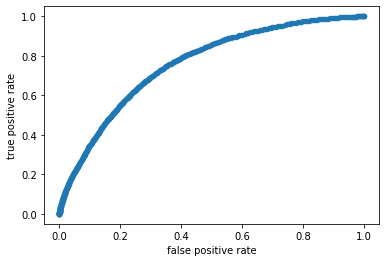

In [133]:
# выводим ROC-кривую для контрольной выборки
tmp = glm_model.roc(valid=True)
df = pd.DataFrame({'false positive rate': tmp[0], 'true positive rate': tmp[1]})
df.plot(kind='scatter', x='false positive rate', y='true positive rate')

In [134]:
# записываем таблицу коэффициентов
coeff_table = glm_model._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pandas
coeff_table.as_data_frame()

,names,coefficients,standardized_coefficients
0,Intercept,-1.274,-1.274
1,living_region.ADYGEJA,0.354,0.354
2,living_region.ALTAJ,0.000,0.000
3,living_region.ALTAJSKIJ,-0.101,-0.101
4,living_region.AMURSKAJA,-0.030,-0.030
5,living_region.ARHANGEL'SKAJA,-0.048,-0.048
6,living_region.ASTRAHANSKAJA,-0.262,-0.262
7,living_region.BASHKORTOSTAN,-0.086,-0.086
8,living_region.BELGORODSKAJA,0.000,0.000
9,living_region.BRJANSKAJA,0.154,0.154


In [135]:
# еще можно добавлять взаимодействия признаков

# создаем экземпляр класса H2OGeneralizedLinearEstimator,
# задавая lambda_search и список переменных для взаимодействий
glm_model2 = H2OGeneralizedLinearEstimator(model_id='logreg_credit2', family='binomial', 
                                           lambda_search=True,
                                           interactions=['monthcat',
                                                         'credsumcat',
                                                         'paymcat'])
# обучаем модель с взаимодействиями
glm_model2.train(predictors, dependent, training_frame=tr, 
                 validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [136]:
# смотрим модель с взаимодействиями
glm_model2

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  logreg_credit2


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 4.865E-5 )","nlambda = 100, lambda.max = 0.06283, lambda.min = 4.865E-5, lambda...",401,220,105,Key_Frame__upload_9fc720557d28749131c6a38f78b9499d.hex




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.12591475953467518
RMSE: 0.35484469776886224
LogLoss: 0.40144127407417024
Null degrees of freedom: 119521
Residual degrees of freedom: 119301
Null deviance: 111168.75088405679
Residual deviance: 95962.12791978597
AIC: 96404.12791978597
AUC: 0.7588284226073222
AUCPR: 0.39903037081816495
Gini: 0.5176568452146444

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2057617620979711: 


,,No,Yes,Error,Rate
0,No,72917.000,25586.000,0.2597,(25586.0/98503.0)
1,Yes,7535.000,13484.000,0.3585,(7535.0/21019.0)
2,Total,80452.000,39070.000,0.2771,(33121.0/119522.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.206,0.449,235.000
1,max f2,0.124,0.594,297.000
2,max f0point5,0.317,0.413,165.000
3,max accuracy,0.546,0.829,67.000
4,max precision,0.783,0.742,15.000
5,max recall,0.009,1.000,399.000
6,max specificity,0.957,1.000,0.000
7,max absolute_mcc,0.206,0.310,235.000
8,max min_per_class_accuracy,0.182,0.693,251.000
9,max mean_per_class_accuracy,0.157,0.696,270.000



Gains/Lift Table: Avg response rate: 17.59 %, avg score: 17.59 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010,0.636,3.889,3.889,0.684,0.714,0.684,0.714,0.039,0.039,288.918,288.918
1,,2,0.020,0.561,3.226,3.558,0.567,0.595,0.626,0.655,0.032,0.071,222.625,255.785
2,,3,0.030,0.514,2.750,3.289,0.484,0.536,0.578,0.615,0.027,0.099,175.040,228.878
3,,4,0.040,0.480,2.760,3.157,0.485,0.496,0.555,0.585,0.028,0.126,175.992,215.659
4,,5,0.050,0.453,2.525,3.030,0.444,0.467,0.533,0.562,0.025,0.152,152.464,203.014
5,,6,0.100,0.371,2.233,2.632,0.393,0.407,0.463,0.485,0.112,0.263,123.325,163.173
6,,7,0.150,0.319,2.011,2.425,0.354,0.344,0.426,0.438,0.101,0.364,101.060,142.470
7,,8,0.200,0.280,1.776,2.262,0.312,0.299,0.398,0.403,0.089,0.452,77.557,126.242
8,,9,0.300,0.219,1.536,2.020,0.270,0.248,0.355,0.351,0.154,0.606,53.578,102.021
9,,10,0.400,0.170,1.166,1.807,0.205,0.194,0.318,0.312,0.117,0.723,16.611,80.669




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.12643267062981894
RMSE: 0.3555737203869529
LogLoss: 0.40195361808432584
Null degrees of freedom: 51223
Residual degrees of freedom: 51003
Null deviance: 47733.009861774684
Residual deviance: 41179.344265503016
AIC: 41621.344265503016
AUC: 0.760231182861175
AUCPR: 0.3953009468713934
Gini: 0.5204623657223499

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2211853700749155: 


,,No,Yes,Error,Rate
0,No,32397.000,9790.000,0.2321,(9790.0/42187.0)
1,Yes,3569.000,5468.000,0.3949,(3569.0/9037.0)
2,Total,35966.000,15258.000,0.2608,(13359.0/51224.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.221,0.450,225.000
1,max f2,0.129,0.596,292.000
2,max f0point5,0.292,0.410,178.000
3,max accuracy,0.524,0.828,72.000
4,max precision,0.771,0.743,16.000
5,max recall,0.013,1.000,398.000
6,max specificity,0.953,1.000,0.000
7,max absolute_mcc,0.221,0.311,225.000
8,max min_per_class_accuracy,0.183,0.695,251.000
9,max mean_per_class_accuracy,0.170,0.698,261.000



Gains/Lift Table: Avg response rate: 17.64 %, avg score: 17.57 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010,0.629,3.679,3.679,0.649,0.713,0.649,0.713,0.037,0.037,267.939,267.939
1,,2,0.020,0.558,2.923,3.301,0.516,0.591,0.582,0.652,0.029,0.066,192.269,230.141
2,,3,0.030,0.510,3.033,3.212,0.535,0.533,0.567,0.612,0.030,0.096,203.340,221.213
3,,4,0.040,0.477,2.701,3.084,0.477,0.492,0.544,0.582,0.027,0.123,170.128,208.448
4,,5,0.050,0.452,2.398,2.947,0.423,0.464,0.520,0.559,0.024,0.147,139.768,194.696
5,,6,0.100,0.369,2.191,2.569,0.387,0.406,0.453,0.482,0.110,0.257,119.116,156.914
6,,7,0.150,0.321,2.038,2.392,0.360,0.344,0.422,0.436,0.102,0.359,103.845,139.226
7,,8,0.200,0.281,1.872,2.262,0.330,0.300,0.399,0.402,0.094,0.452,87.245,126.232
8,,9,0.300,0.219,1.549,2.025,0.273,0.249,0.357,0.351,0.155,0.607,54.931,102.467
9,,10,0.400,0.171,1.191,1.816,0.210,0.194,0.320,0.312,0.119,0.726,19.052,81.611




Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
0,,2020-06-02 09:51:00,0.000 sec,1,.63E-1,1,0.930,0.932
1,,2020-06-02 09:51:01,0.171 sec,2,.57E-1,3,0.929,0.931
2,,2020-06-02 09:51:01,0.279 sec,3,.52E-1,4,0.928,0.930
3,,2020-06-02 09:51:01,0.379 sec,4,.48E-1,4,0.927,0.928
4,,2020-06-02 09:51:01,0.521 sec,5,.43E-1,4,0.926,0.927
5,,2020-06-02 09:51:01,0.642 sec,6,.39E-1,6,0.923,0.925
6,,2020-06-02 09:51:01,0.769 sec,8,.36E-1,8,0.919,0.921
7,,2020-06-02 09:51:01,0.872 sec,10,.33E-1,10,0.913,0.914
8,,2020-06-02 09:51:01,0.995 sec,12,.3E-1,11,0.907,0.908
9,,2020-06-02 09:51:01,1.122 sec,14,.27E-1,12,0.902,0.902



See the whole table with table.as_data_frame()


In [137]:
# чтобы вычислить p-значения коэффициентов, нужно 
# задать compute_p_values=True, отключить 
# регуляризацию (lambda_=0), задать метод наименьших 
# квадратов с итеративным пересчётом весов (solver='IRLSM'),
# рекомендуется задать параметр remove_collinear_columns

# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model3 = H2OGeneralizedLinearEstimator(model_id='logreg_credit3', lambda_=0, 
                                           family='binomial', solver='IRLSM',
                                           remove_collinear_columns=True,
                                           compute_p_values=True)
# обучаем модель
glm_model3.train(predictors, dependent, training_frame=tr, 
                 validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [138]:
# записываем таблицу коэффициентов
coeff_table = glm_model3._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pandas
coeff_table.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-0.995,0.556,-1.789,0.074,-0.995
1,living_region.ALTAJ,-0.333,0.451,-0.739,0.460,-0.333
2,living_region.ALTAJSKIJ,-0.538,0.193,-2.789,0.005,-0.538
3,living_region.AMURSKAJA,-0.456,0.170,-2.690,0.007,-0.456
4,living_region.ARHANGEL'SKAJA,-0.447,0.154,-2.898,0.004,-0.447
5,living_region.ASTRAHANSKAJA,-0.665,0.152,-4.382,0.000,-0.665
6,living_region.BASHKORTOSTAN,-0.481,0.139,-3.466,0.001,-0.481
7,living_region.BELGORODSKAJA,-0.390,0.179,-2.172,0.030,-0.390
8,living_region.BRJANSKAJA,-0.216,0.172,-1.261,0.207,-0.216
9,living_region.BURJATIJA,-0.172,0.158,-1.094,0.274,-0.172


In [139]:
# импортируем класс H2OGridSearch для выполнения решетчатого поиска
from h2o.grid.grid_search import H2OGridSearch

# задаем сетку параметров, будем перебирать разные значения alpha,
# alpha определяет тип регуляризации: значение 1 соответствует 
# l1-регуляризации (лассо), значение 0 соответствует l2-регуляризации 
# (гребневой регрессии), промежуточное значение соответствует 
# комбинации штрафов l1 и l2 (эластичной сети)
hyper_parameters = {'alpha':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

# создаем экземпляр класса H2OGridSearch, lambda_search 
# задает перебор значений lambda - силы регуляризации
gridsearch = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', 
                                                         lambda_search=True),
                           grid_id='grid_logreg', hyper_params=hyper_parameters)

# подгоняем модели решетчатого поиска
gridsearch.train(predictors, dependent, 
                 training_frame=tr, 
                 nfolds=5, 
                 keep_cross_validation_predictions=True, 
                 seed=1000000)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [140]:
# выводим результаты решетчатого поиска
gridsearch.show()

      alpha             model_ids              logloss
0     [0.8]   grid_logreg_model_9   0.4037839045814108
1     [1.0]  grid_logreg_model_11    0.403784364693697
2     [0.0]   grid_logreg_model_1   0.4037849070283702
3     [0.9]  grid_logreg_model_10  0.40378733752656615
4     [0.7]   grid_logreg_model_8  0.40380128855522823
5     [0.6]   grid_logreg_model_7   0.4038192036403215
6     [0.5]   grid_logreg_model_6   0.4038506734726823
7     [0.4]   grid_logreg_model_5   0.4038592327919047
8     [0.3]   grid_logreg_model_4  0.40387740321894755
9     [0.2]   grid_logreg_model_3  0.40390495413889543
10    [0.1]   grid_logreg_model_2  0.40393361341055306


In [141]:
# сортируем результаты решетчатого поиска
# по убывания AUC
gridperf = gridsearch.get_grid(sort_by='auc', decreasing=True)
gridperf

      alpha             model_ids                 auc
0     [0.0]   grid_logreg_model_1   0.754933128755733
1     [0.9]  grid_logreg_model_10  0.7548608036008548
2     [1.0]  grid_logreg_model_11  0.7548595726998387
3     [0.8]   grid_logreg_model_9  0.7548593483508013
4     [0.7]   grid_logreg_model_8  0.7548466966589565
5     [0.6]   grid_logreg_model_7  0.7548239837942388
6     [0.5]   grid_logreg_model_6  0.7547724393010119
7     [0.4]   grid_logreg_model_5  0.7547632888065247
8     [0.3]   grid_logreg_model_4  0.7547479461337062
9     [0.2]   grid_logreg_model_3  0.7547082614695751
10    [0.1]   grid_logreg_model_2  0.7546777159496569


In [142]:
# извлекаем наилучшую модель
best_model = gridperf.models[0]
best_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  grid_logreg_model_1


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 5.058E-6 ),"nlambda = 30, lambda.max = 3.1414, lambda.min = 5.058E-6, lambda.1...",194,194,54,Key_Frame__upload_9fc720557d28749131c6a38f78b9499d.hex




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1261073170821023
RMSE: 0.35511592062607145
LogLoss: 0.4020662889694322
Null degrees of freedom: 119521
Residual degrees of freedom: 119327
Null deviance: 111168.75088405679
Residual deviance: 96111.53398040895
AIC: 96501.53398040895
AUC: 0.7579983867125919
AUCPR: 0.39821993955421137
Gini: 0.5159967734251838

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21138277448316373: 


,,No,Yes,Error,Rate
0,No,74448.000,24055.000,0.2442,(24055.0/98503.0)
1,Yes,8006.000,13013.000,0.3809,(8006.0/21019.0)
2,Total,82454.000,37068.000,0.2682,(32061.0/119522.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.211,0.448,234.000
1,max f2,0.112,0.593,308.000
2,max f0point5,0.307,0.411,175.000
3,max accuracy,0.560,0.829,66.000
4,max precision,0.814,0.759,12.000
5,max recall,0.011,1.000,397.000
6,max specificity,0.961,1.000,0.000
7,max absolute_mcc,0.211,0.309,234.000
8,max min_per_class_accuracy,0.178,0.694,256.000
9,max mean_per_class_accuracy,0.161,0.696,267.000



Gains/Lift Table: Avg response rate: 17.59 %, avg score: 17.59 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010,0.644,3.889,3.889,0.684,0.724,0.684,0.724,0.039,0.039,288.918,288.918
1,,2,0.020,0.569,3.221,3.555,0.567,0.603,0.625,0.664,0.032,0.071,222.149,255.547
2,,3,0.030,0.521,2.741,3.284,0.482,0.543,0.578,0.624,0.027,0.099,174.088,228.402
3,,4,0.040,0.486,2.779,3.158,0.489,0.502,0.555,0.593,0.028,0.126,177.895,215.778
4,,5,0.050,0.458,2.482,3.023,0.436,0.472,0.532,0.569,0.025,0.151,148.185,202.252
5,,6,0.100,0.374,2.205,2.614,0.388,0.412,0.460,0.490,0.110,0.261,120.471,161.365
6,,7,0.150,0.322,2.002,2.410,0.352,0.346,0.424,0.442,0.100,0.361,100.203,140.979
7,,8,0.200,0.280,1.831,2.265,0.322,0.300,0.398,0.407,0.092,0.453,83.076,126.504
8,,9,0.300,0.216,1.524,2.018,0.268,0.247,0.355,0.353,0.152,0.605,52.436,101.815
9,,10,0.400,0.165,1.169,1.806,0.206,0.190,0.318,0.313,0.117,0.722,16.944,80.598




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.126655672465986
RMSE: 0.35588716254732483
LogLoss: 0.4037849070283702
Null degrees of freedom: 119521
Residual degrees of freedom: 119327
Null deviance: 111169.85670576082
Residual deviance: 96522.35931568974
AIC: 96912.35931568974
AUC: 0.754933128755733
AUCPR: 0.39359250076496327
Gini: 0.5098662575114661

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21156821735535855: 


,,No,Yes,Error,Rate
0,No,74413.000,24090.000,0.2446,(24090.0/98503.0)
1,Yes,8112.000,12907.000,0.3859,(8112.0/21019.0)
2,Total,82525.000,36997.000,0.2694,(32202.0/119522.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.212,0.445,232.000
1,max f2,0.109,0.591,310.000
2,max f0point5,0.315,0.407,167.000
3,max accuracy,0.546,0.829,69.000
4,max precision,0.808,0.734,11.000
5,max recall,0.004,1.000,399.000
6,max specificity,0.959,1.000,0.000
7,max absolute_mcc,0.212,0.304,232.000
8,max min_per_class_accuracy,0.177,0.692,257.000
9,max mean_per_class_accuracy,0.168,0.694,264.000



Gains/Lift Table: Avg response rate: 17.59 %, avg score: 17.59 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010,0.645,3.842,3.842,0.676,0.725,0.676,0.725,0.038,0.038,284.163,284.163
1,,2,0.020,0.570,3.174,3.508,0.558,0.604,0.617,0.665,0.032,0.070,217.390,250.791
2,,3,0.030,0.521,2.760,3.259,0.485,0.544,0.573,0.624,0.028,0.098,175.992,225.865
3,,4,0.040,0.487,2.703,3.120,0.475,0.503,0.549,0.594,0.027,0.125,170.281,211.972
4,,5,0.050,0.460,2.449,2.985,0.431,0.473,0.525,0.570,0.025,0.149,144.857,198.542
5,,6,0.100,0.375,2.188,2.587,0.385,0.412,0.455,0.491,0.109,0.259,118.758,158.653
6,,7,0.150,0.322,1.972,2.382,0.347,0.347,0.419,0.443,0.099,0.357,97.158,138.156
7,,8,0.200,0.281,1.827,2.243,0.321,0.301,0.394,0.407,0.091,0.449,82.695,124.291
8,,9,0.300,0.216,1.525,2.004,0.268,0.247,0.352,0.354,0.153,0.601,52.531,100.372
9,,10,0.400,0.165,1.169,1.795,0.206,0.190,0.316,0.313,0.117,0.718,16.896,79.504




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.72754216,0.014031829,0.7378287,0.72542673,0.74427384,0.72169596,0.70848554
1,auc,0.75495374,0.0037751058,0.75408745,0.7561658,0.7581882,0.7488096,0.75751764
2,aucpr,0.39381367,0.003707115,0.3969832,0.3898708,0.3936273,0.39049333,0.39809376
3,err,0.27245787,0.014031829,0.26217133,0.27457327,0.25572616,0.27830404,0.29151446
4,err_count,6514.0,362.54172,6252.0,6531.0,6096.0,6669.0,7022.0
5,f0point5,0.3813394,0.009978672,0.38310927,0.38730592,0.3937082,0.37278125,0.36979234
6,f1,0.4461026,0.006811861,0.44288006,0.4547959,0.4514039,0.4381161,0.44331694
7,f2,0.5377972,0.013249283,0.5247487,0.55077034,0.5289131,0.53121936,0.55333465
8,lift_top_group,3.8109827,0.27733824,4.0132384,3.4803045,3.5392587,3.9691155,4.052996
9,logloss,0.40377364,0.002895835,0.4012326,0.40783975,0.40294474,0.4056192,0.40123194



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
0,,2020-06-02 09:51:34,0.000 sec,2,.31E1,195,0.925,nan,0.926,0.002
1,,2020-06-02 09:51:34,0.122 sec,4,.2E1,195,0.923,nan,0.924,0.002
2,,2020-06-02 09:51:34,0.239 sec,6,.12E1,195,0.919,nan,0.921,0.002
3,,2020-06-02 09:51:35,0.354 sec,8,.75E0,195,0.914,nan,0.917,0.002
4,,2020-06-02 09:51:35,0.472 sec,10,.47E0,195,0.908,nan,0.911,0.002
5,,2020-06-02 09:51:35,0.588 sec,12,.29E0,195,0.901,nan,0.905,0.002
6,,2020-06-02 09:51:35,0.704 sec,14,.18E0,195,0.893,nan,0.897,0.002
7,,2020-06-02 09:51:35,0.832 sec,16,.11E0,195,0.883,nan,0.888,0.002
8,,2020-06-02 09:51:35,0.951 sec,18,.69E-1,195,0.874,nan,0.879,0.002
9,,2020-06-02 09:51:35,1.070 sec,20,.43E-1,195,0.863,nan,0.868,0.002



See the whole table with table.as_data_frame()


In [143]:
# смотрим AUC наилучшей модели
# на контрольной выборке
bestmodel_perf = best_model.model_performance(valid)
print(bestmodel_perf.auc())

0.7595337317367153


In [144]:
# смотрим оптимальные значения lambda_ и alpha
best_model.summary()['regularization']

['Ridge ( lambda = 5.058E-6 )']

In [145]:
# завершаем работу с H2O
h2o.cluster().shutdown()

H2O session _sid_99ca closed.
